# Naukari Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
df=pd.read_csv(r"C:\Users\Telang\Documents\final_data_of naukari anyalsis.csv")
df.head()

Unnamed: 0    Company Experience Job_Post_History Location  Ratings  \
0           0  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2   
1           1  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2   
2           2  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2   
3           3  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2   
4           4  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2   

           Reviews         Salary         Skills  \
0  (30336 Reviews)  Not disclosed  Due diligence   
1  (30336 Reviews)  Not disclosed  Due diligence   
2  (30336 Reviews)  Not disclosed  Due diligence   
3  (30336 Reviews)  Not disclosed  Due diligence   
4  (30336 Reviews)  Not disclosed  Due diligence   

                                             Title  \
0  Senior Analyst-Finance Processes and Operations   
1  Senior Analyst-Finance Processes and Operations   
2  Senior Analyst-Finance Processes and Operations   
3  Senior Analyst-Finance Processes and Operations   
4  Senior Analyst-Finance Processes and Operations   

                                                 URL  
0  https://www.naukri.com/job-listings-senior-ana...  
1  https://www.naukri.com/job-listings-senior-ana...  
2  https://www.naukri.com/job-listings-senior-ana...  
3  https://www.naukri.com/job-listings-senior-ana...  
4  https://www.naukri.com/job-listings-senior-ana...

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        560 non-null    int64  
 1   Company           560 non-null    object 
 2   Experience        560 non-null    object 
 3   Job_Post_History  560 non-null    object 
 4   Location          560 non-null    object 
 5   Ratings           560 non-null    float64
 6   Reviews           560 non-null    object 
 7   Salary            560 non-null    object 
 8   Skills            560 non-null    object 
 9   Title             560 non-null    object 
 10  URL               560 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.3+ KB


## EDA

In [63]:
# checking for null values
df.isnull().sum()

Unnamed: 0          0
Company             0
Experience          0
Job_Post_History    0
Location            0
Ratings             0
Reviews             0
Salary              0
Skills              0
Title               0
URL                 0
dtype: int64

In [65]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
        Unnamed: 0    Company Experience Job_Post_History Location  \
count   560.000000        560        560              560      560   
unique         NaN         28         20               10       11   
top            NaN  Accenture    3-5 Yrs        1 Day Ago     Pune   
freq           NaN        160         90              170      150   
mean    279.500000        NaN        NaN              NaN      NaN   
std     161.802349        NaN        NaN              NaN      NaN   
min       0.000000        NaN        NaN              NaN      NaN   
25%     139.750000        NaN        NaN              NaN      NaN   
50%     279.500000        NaN        NaN              NaN      NaN   
75%     419.250000        NaN        NaN              NaN      NaN   
max     559.000000        NaN        NaN              NaN      NaN   

           Ratings          Reviews         Salary              Skills  \
count   560.000000              560            560              

In [67]:
# Clean and standardize records
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()  # remove leading/trailing spaces & newline


In [69]:
df['Title'] = df['Title'].replace({'Lead/Senior Analyst Structured finance - 2 To 10 years BNY Mellon Pune':'Lead/Senior Analyst Structured finance',
                                   'Immediate Hiring For Financial Analyst':'Financial Analyst',
                                  'SAP FI CO Finance Business Analyst':'SAP FICO Finance Business Analyst'})

In [71]:
df['Location'] = df['Location'].replace({'Mumbai (All Areas)':'Mumbai','Chennai(Teynampet)':'Chennai',
                                        'Chennai(Ekkaduthangal)':'Chennai','Chennai(Kodambakkam), Kodambakkam':'Chennai'})

- 'Finance Analyst\n'--done  
- 'Lead/Senior Analyst Structured finance - 2 To 10 years BNY Mellon Pune',
- 'Immediate Hiring For Financial Analyst',


In [74]:
# Start cleaning the data

# 1. Drop the "Unnamed: 0" column
df_cleaned = df.drop(columns=["Unnamed: 0"])

# 2. Clean "Experience" column - extract numeric min and max experience
df_cleaned["Experience_Min"] = df["Experience"].str.extract(r'(\d+)', expand=False).astype(int)
df_cleaned["Experience_Max"] = df["Experience"].str.extract(r'-(\d+)', expand=False)
df_cleaned["Experience_Max"] = df_cleaned["Experience_Max"].fillna(df_cleaned["Experience_Min"]).astype(int)
df_cleaned["Experience_Avg"] = (df_cleaned["Experience_Min"] + df_cleaned["Experience_Max"]) / 2

# 3. Clean "Reviews" column - remove parentheses and text
df_cleaned["Reviews"] = df["Reviews"].str.extract(r'(\d+)').astype(int)
# Strip whitespace from text fields
text_columns = ["Company", "Job_Post_History", "Location", "Skills", "Title", "URL"]
df_cleaned[text_columns] = df_cleaned[text_columns].apply(lambda x: x.str.strip())

# Show the cleaned dataset's first few rows
df_cleaned.head()


Company Experience Job_Post_History Location  Ratings  Reviews  \
0  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
1  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
2  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
3  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
4  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   

          Salary         Skills  \
0  Not disclosed  Due diligence   
1  Not disclosed  Due diligence   
2  Not disclosed  Due diligence   
3  Not disclosed  Due diligence   
4  Not disclosed  Due diligence   

                                             Title  \
0  Senior Analyst-Finance Processes and Operations   
1  Senior Analyst-Finance Processes and Operations   
2  Senior Analyst-Finance Processes and Operations   
3  Senior Analyst-Finance Processes and Operations   
4  Senior Analyst-Finance Processes and Operations   

                                                 URL  Experience_Min  \
0  https://www.naukri.com/job-listings-senior-ana...               5   
1  https://www.naukri.com/job-listings-senior-ana...               5   
2  https://www.naukri.com/job-listings-senior-ana...               5   
3  https://www.naukri.com/job-listings-senior-ana...               5   
4  https://www.naukri.com/job-listings-senior-ana...               5   

   Experience_Max  Experience_Avg  
0               8             6.5  
1               8             6.5  
2               8             6.5  
3               8             6.5  
4               8             6.5

In [76]:
# Show the cleaned dataset's first few rows
df_cleaned.head()


Company Experience Job_Post_History Location  Ratings  Reviews  \
0  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
1  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
2  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
3  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   
4  Accenture    5-8 Yrs        1 Day Ago   Mumbai      4.2    30336   

          Salary         Skills  \
0  Not disclosed  Due diligence   
1  Not disclosed  Due diligence   
2  Not disclosed  Due diligence   
3  Not disclosed  Due diligence   
4  Not disclosed  Due diligence   

                                             Title  \
0  Senior Analyst-Finance Processes and Operations   
1  Senior Analyst-Finance Processes and Operations   
2  Senior Analyst-Finance Processes and Operations   
3  Senior Analyst-Finance Processes and Operations   
4  Senior Analyst-Finance Processes and Operations   

                                                 URL  Experience_Min  \
0  https://www.naukri.com/job-listings-senior-ana...               5   
1  https://www.naukri.com/job-listings-senior-ana...               5   
2  https://www.naukri.com/job-listings-senior-ana...               5   
3  https://www.naukri.com/job-listings-senior-ana...               5   
4  https://www.naukri.com/job-listings-senior-ana...               5   

   Experience_Max  Experience_Avg  
0               8             6.5  
1               8             6.5  
2               8             6.5  
3               8             6.5  
4               8             6.5

In [78]:
import re
#clean the "job_post_history" colunm
def clean_job_post_history(post_history):
  if isinstance(post_history,str):
    post_history=re.sub(r'\s*Day Ago','',post_history)
    post_history=re.sub(r'\s*Days Ago','',post_history)
    post_history=re.sub(r'\s*Hour Ago','',post_history)
    post_history=re.sub(r'\s*Hours Ago','',post_history)
  return post_history if post_history else None

df_cleaned['Job_Post_History']=df_cleaned['Job_Post_History'].apply(clean_job_post_history)

In [80]:
# Cleaning salary column
def clean_salary(salary):
    if pd.isna(salary) or "Not Disclosed" in str(salary):
        return np.nan
    salary = str(salary)
    salary = salary.replace(",", '').replace("per year", "").replace("per annum", "").strip()

    if 'L' in salary:
        salary = salary.replace("L", "0000")

    numbers = re.findall(r"\d+(?:\.\d+)?", salary)

    if len(numbers) == 0:
        return np.nan

    numbers = [float(num) for num in numbers]

    if len(numbers) == 2:
        return sum(numbers) / 2

    return numbers[0]

# Apply cleaning
df_cleaned['cleaned_Salary'] = df_cleaned['Salary'].apply(clean_salary)

# Fill missing values with median of cleaned salary
df_cleaned['Cleaned_Salary'] = df_cleaned['cleaned_Salary'].fillna(df_cleaned['cleaned_Salary'].median())

# Drop the original salary column
df_cleaned = df_cleaned.drop(columns=['Salary', 'cleaned_Salary'])

df_cleaned.head()


Company Experience Job_Post_History Location  Ratings  Reviews  \
0  Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
1  Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
2  Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
3  Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
4  Accenture    5-8 Yrs                1   Mumbai      4.2    30336   

          Skills                                            Title  \
0  Due diligence  Senior Analyst-Finance Processes and Operations   
1  Due diligence  Senior Analyst-Finance Processes and Operations   
2  Due diligence  Senior Analyst-Finance Processes and Operations   
3  Due diligence  Senior Analyst-Finance Processes and Operations   
4  Due diligence  Senior Analyst-Finance Processes and Operations   

                                                 URL  Experience_Min  \
0  https://www.naukri.com/job-listings-senior-ana...               5   
1  https://www.naukri.com/job-listings-senior-ana...               5   
2  https://www.naukri.com/job-listings-senior-ana...               5   
3  https://www.naukri.com/job-listings-senior-ana...               5   
4  https://www.naukri.com/job-listings-senior-ana...               5   

   Experience_Max  Experience_Avg  Cleaned_Salary  
0               8             6.5        900000.0  
1               8             6.5        900000.0  
2               8             6.5        900000.0  
3               8             6.5        900000.0  
4               8             6.5        900000.0

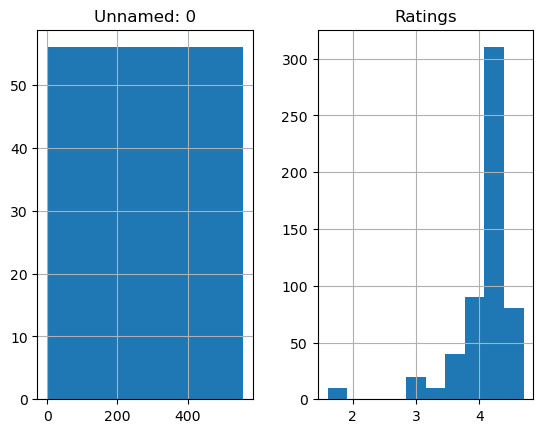

In [82]:
# Histogram - Ratings
df.hist()
plt.show()

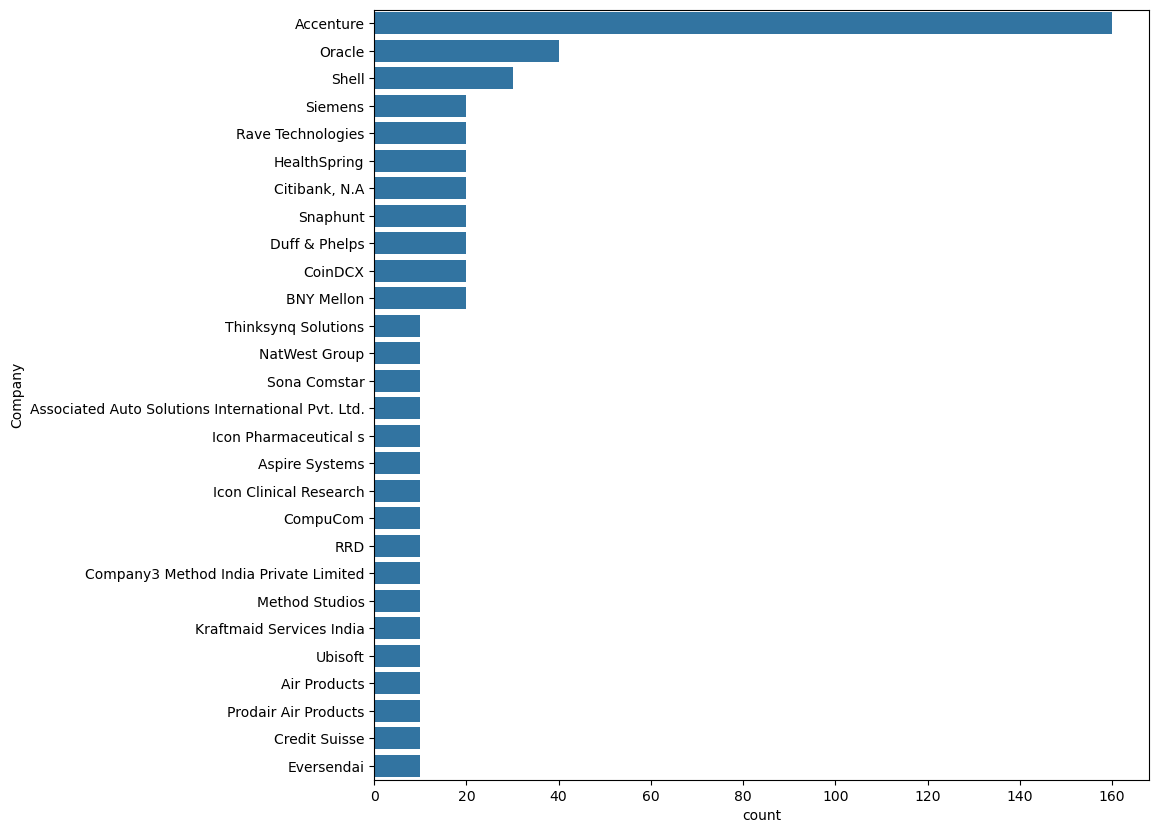

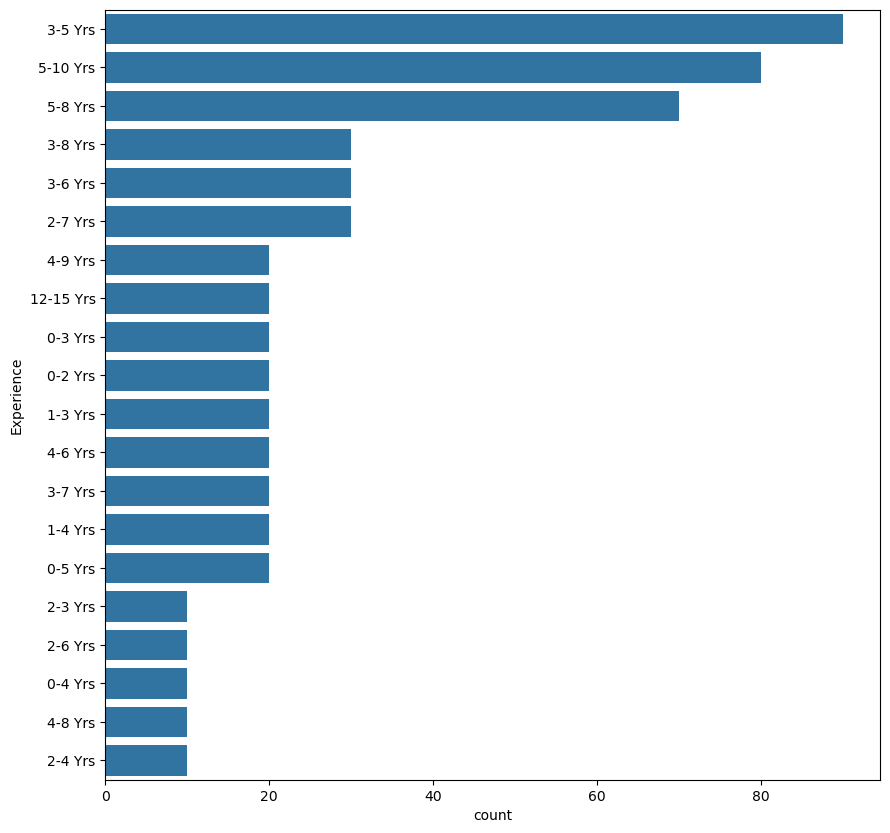

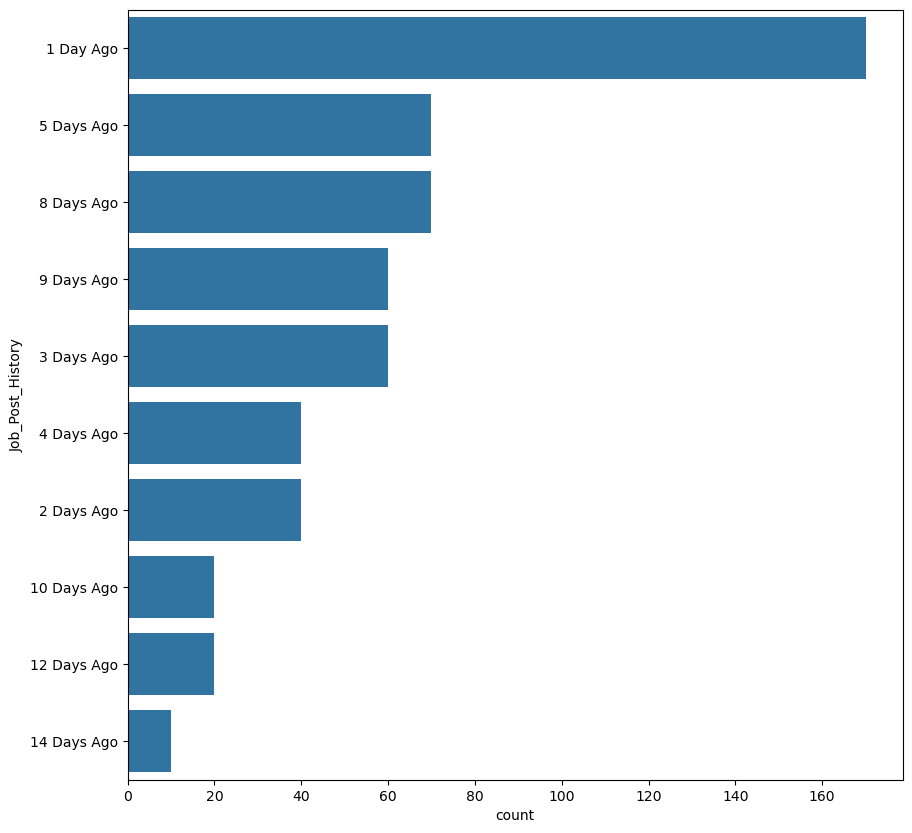

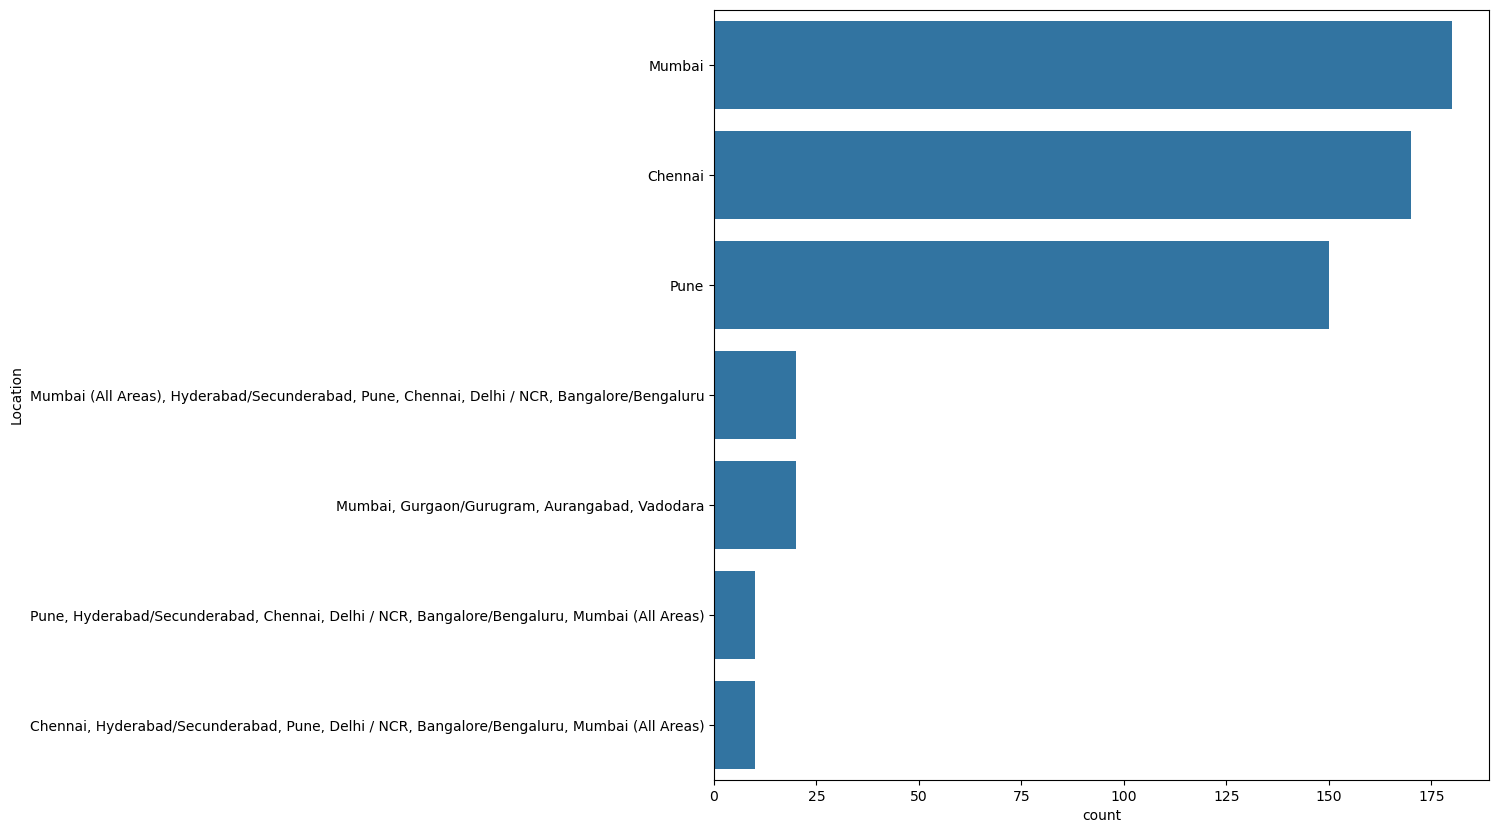

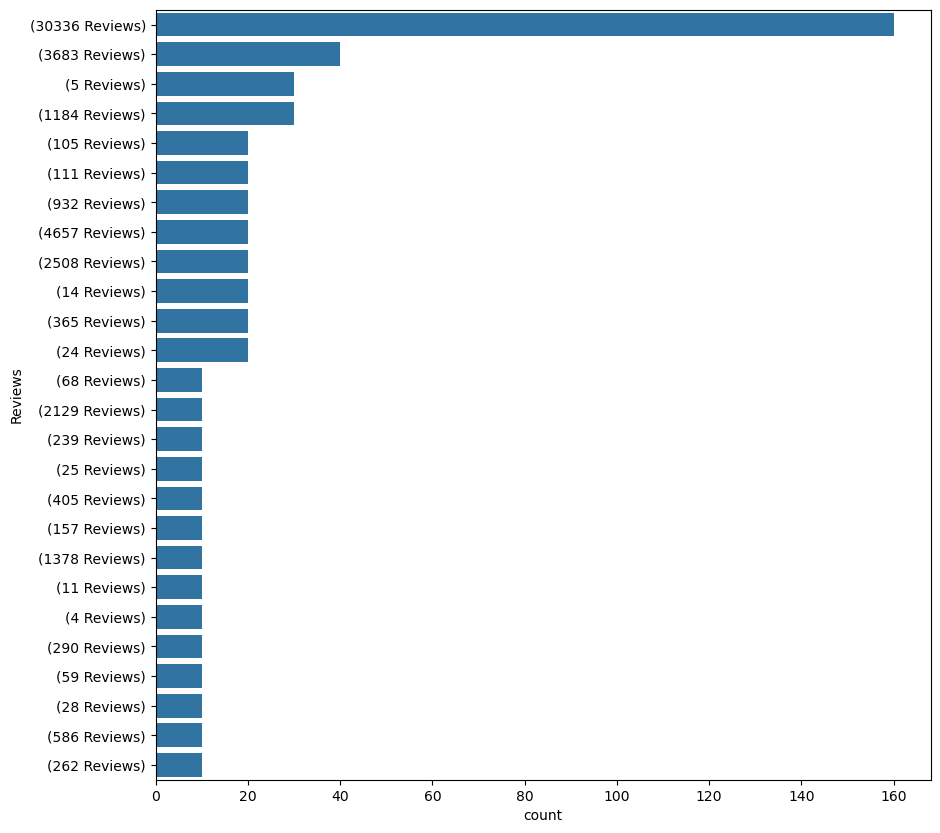

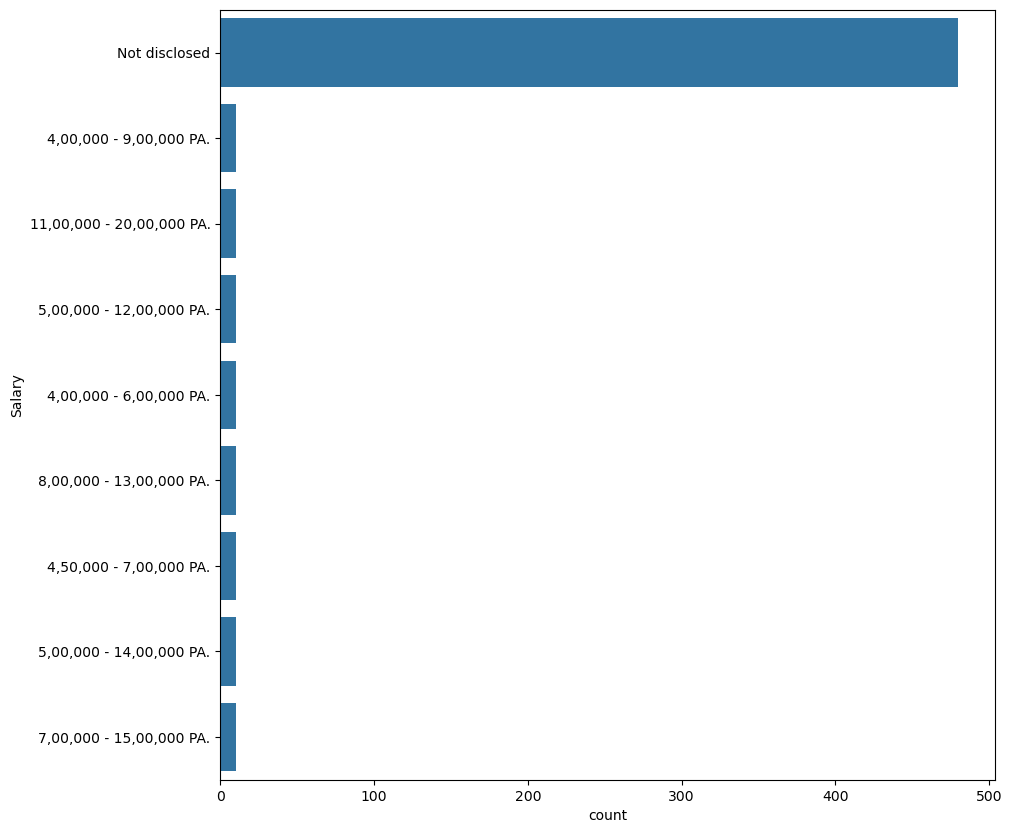

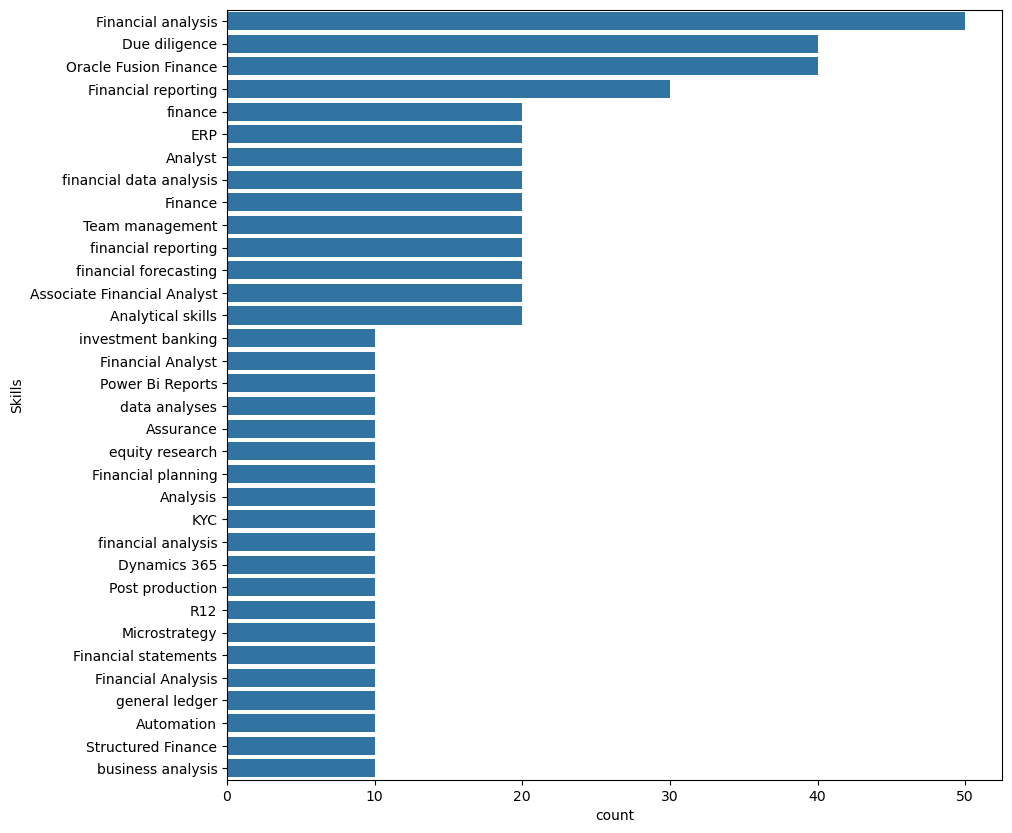

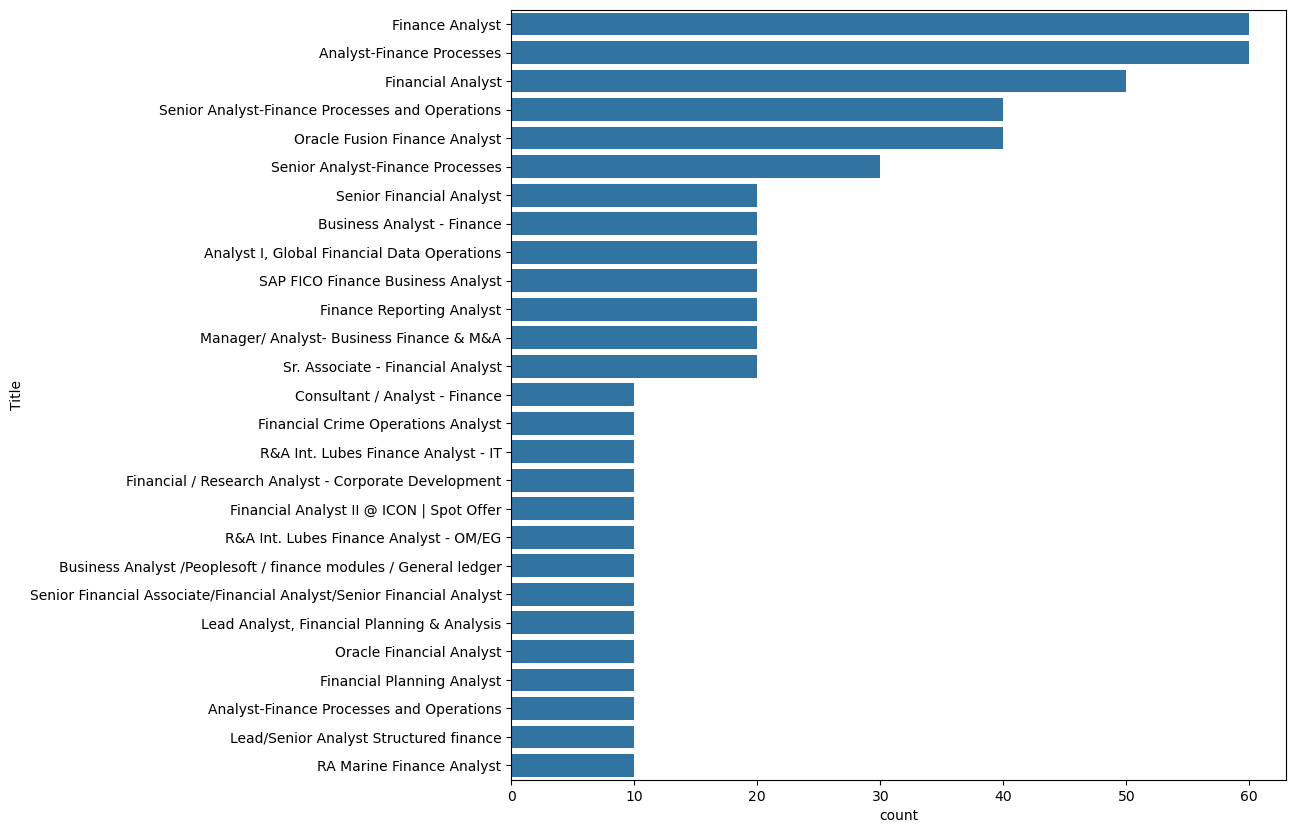

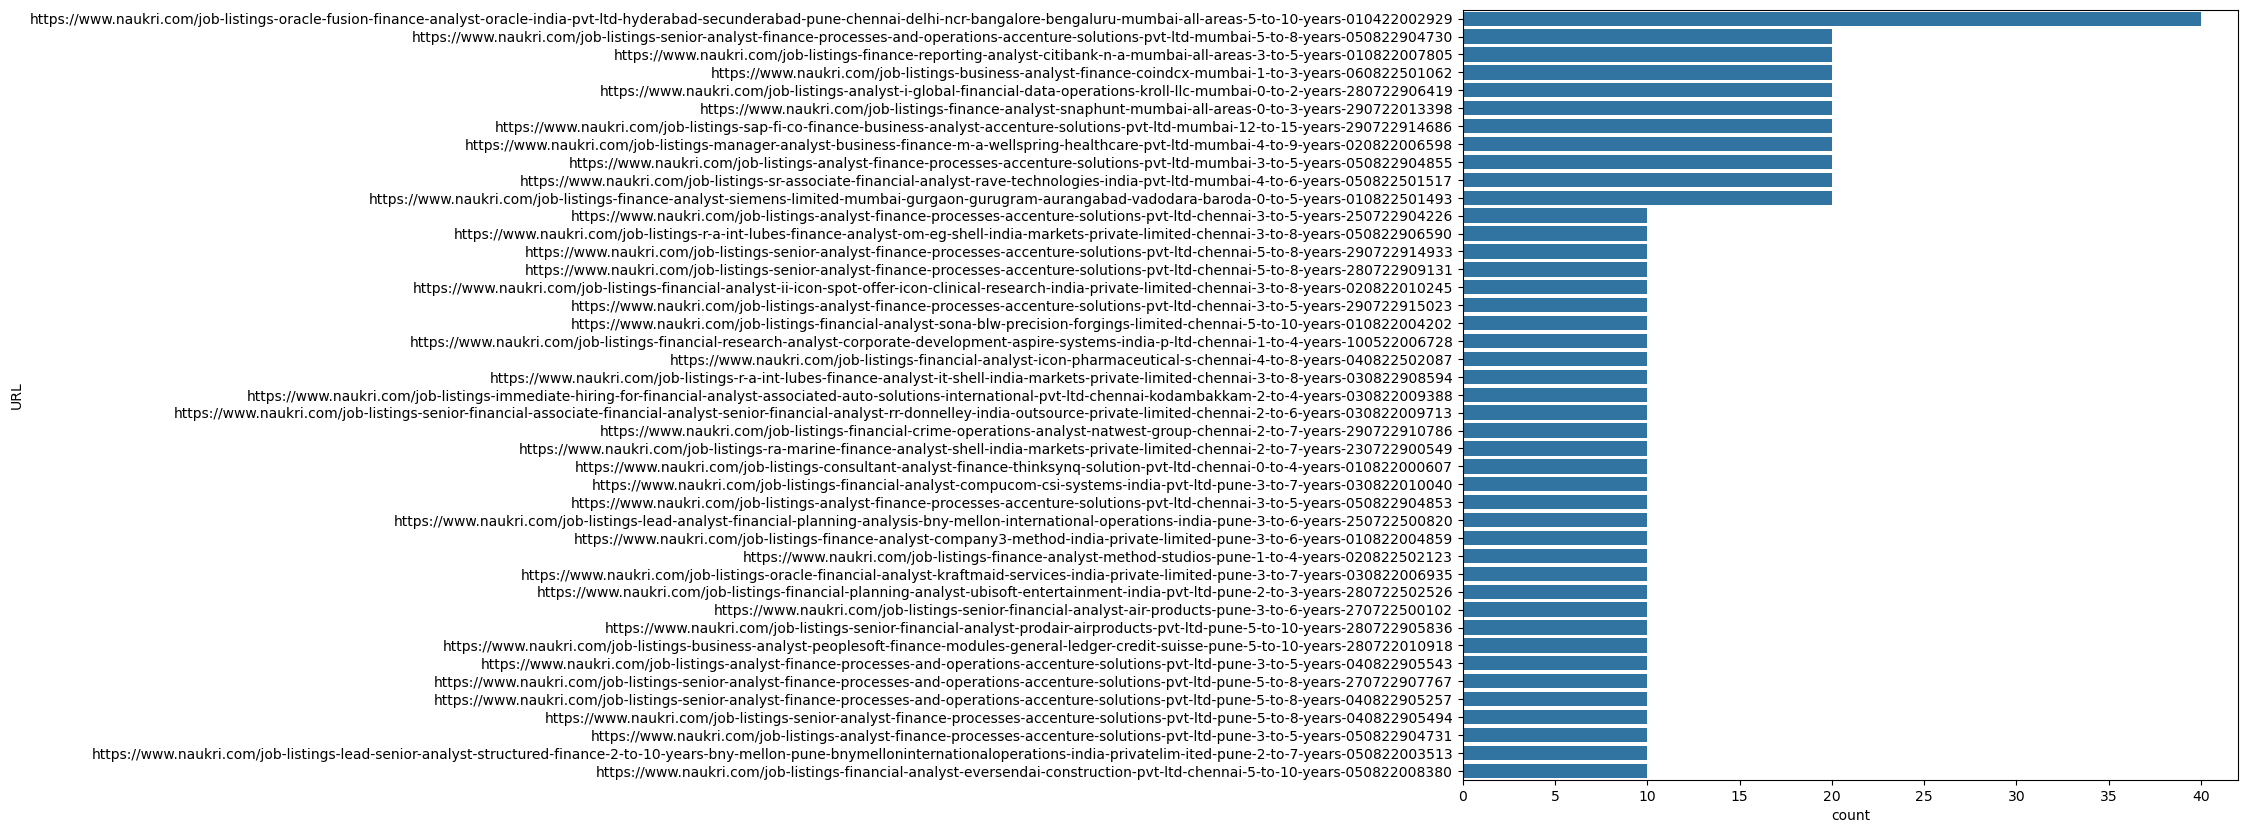

In [84]:
# Count-plot of all categorical variables
for col in df.columns:
    if df[col].dtype == 'object':  # Only for categorical columns
        plt.figure(figsize=(10,10))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.show()

In [86]:
def categorize_salary(salary):
    if pd.isna(salary):
        return 'unknown'  # for NaN salary
    elif salary < 500000:
        return 'low'
    elif salary < 1000000:
        return 'medium'
    else:
        return 'high'

# Apply to the cleaned salary column
df_cleaned['Salary_Category'] = df_cleaned['Cleaned_Salary'].apply(categorize_salary)
df_cleaned


Company Experience Job_Post_History Location  Ratings  Reviews  \
0     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
1     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
2     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
3     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
4     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
..          ...        ...              ...      ...      ...      ...   
555  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
556  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
557  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
558  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
559  Eversendai   5-10 Yrs                1  Chennai      3.7      262   

                  Skills                                            Title  \
0          Due diligence  Senior Analyst-Finance Processes and Operations   
1          Due diligence  Senior Analyst-Finance Processes and Operations   
2          Due diligence  Senior Analyst-Finance Processes and Operations   
3          Due diligence  Senior Analyst-Finance Processes and Operations   
4          Due diligence  Senior Analyst-Finance Processes and Operations   
..                   ...                                              ...   
555  Financial reporting                                Financial Analyst   
556  Financial reporting                                Financial Analyst   
557  Financial reporting                                Financial Analyst   
558  Financial reporting                                Financial Analyst   
559  Financial reporting                                Financial Analyst   

                                                   URL  Experience_Min  \
0    https://www.naukri.com/job-listings-senior-ana...               5   
1    https://www.naukri.com/job-listings-senior-ana...               5   
2    https://www.naukri.com/job-listings-senior-ana...               5   
3    https://www.naukri.com/job-listings-senior-ana...               5   
4    https://www.naukri.com/job-listings-senior-ana...               5   
..                                                 ...             ...   
555  https://www.naukri.com/job-listings-financial-...               5   
556  https://www.naukri.com/job-listings-financial-...               5   
557  https://www.naukri.com/job-listings-financial-...               5   
558  https://www.naukri.com/job-listings-financial-...               5   
559  https://www.naukri.com/job-listings-financial-...               5   

     Experience_Max  Experience_Avg  Cleaned_Salary Salary_Category  
0                 8             6.5        900000.0          medium  
1                 8             6.5        900000.0          medium  
2                 8             6.5        900000.0          medium  
3                 8             6.5        900000.0          medium  
4                 8             6.5        900000.0          medium  
..              ...             ...             ...             ...  
555              10             7.5       1100000.0            high  
556              10             7.5       1100000.0            high  
557              10             7.5       1100000.0            high  
558              10             7.5       1100000.0            high  
559              10             7.5       1100000.0            high  

[560 rows x 14 columns]

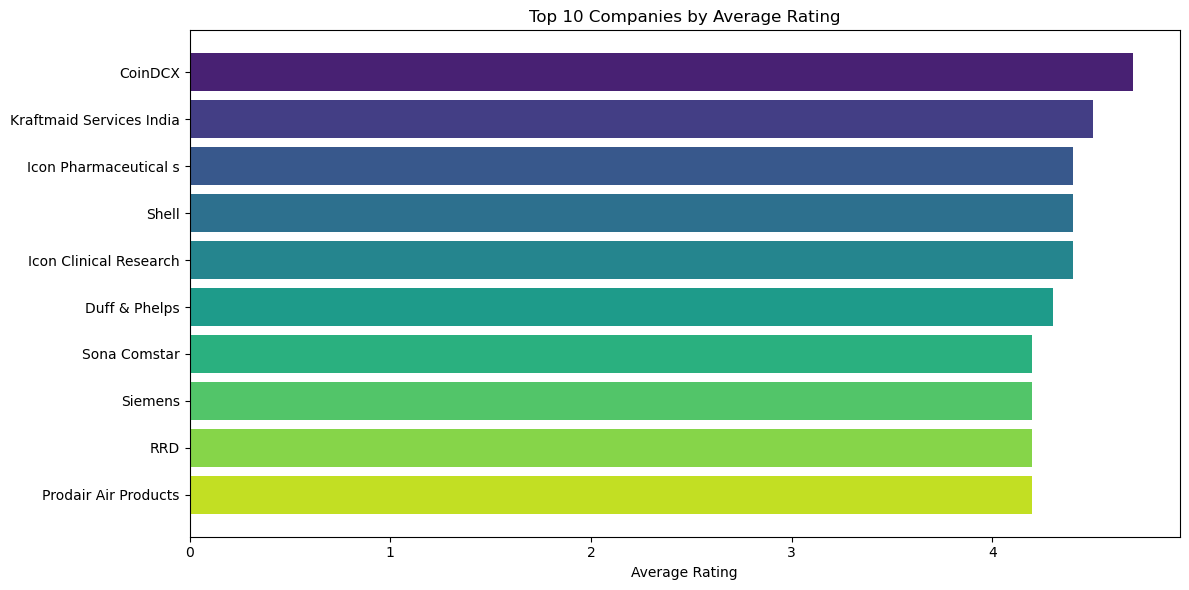

In [88]:
# Top 10 companies by average rating
company_rating = df.groupby('Company')['Ratings'].mean().sort_values(ascending=False).head(10)

# Create color gradient
colors = sns.color_palette("viridis", len(company_rating))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(company_rating.index, company_rating.values, color=colors)

# Titles and labels
plt.xlabel('Average Rating')
plt.title('Top 10 Companies by Average Rating')
plt.gca().invert_yaxis()  # Highest rated at top
plt.tight_layout()
plt.show()

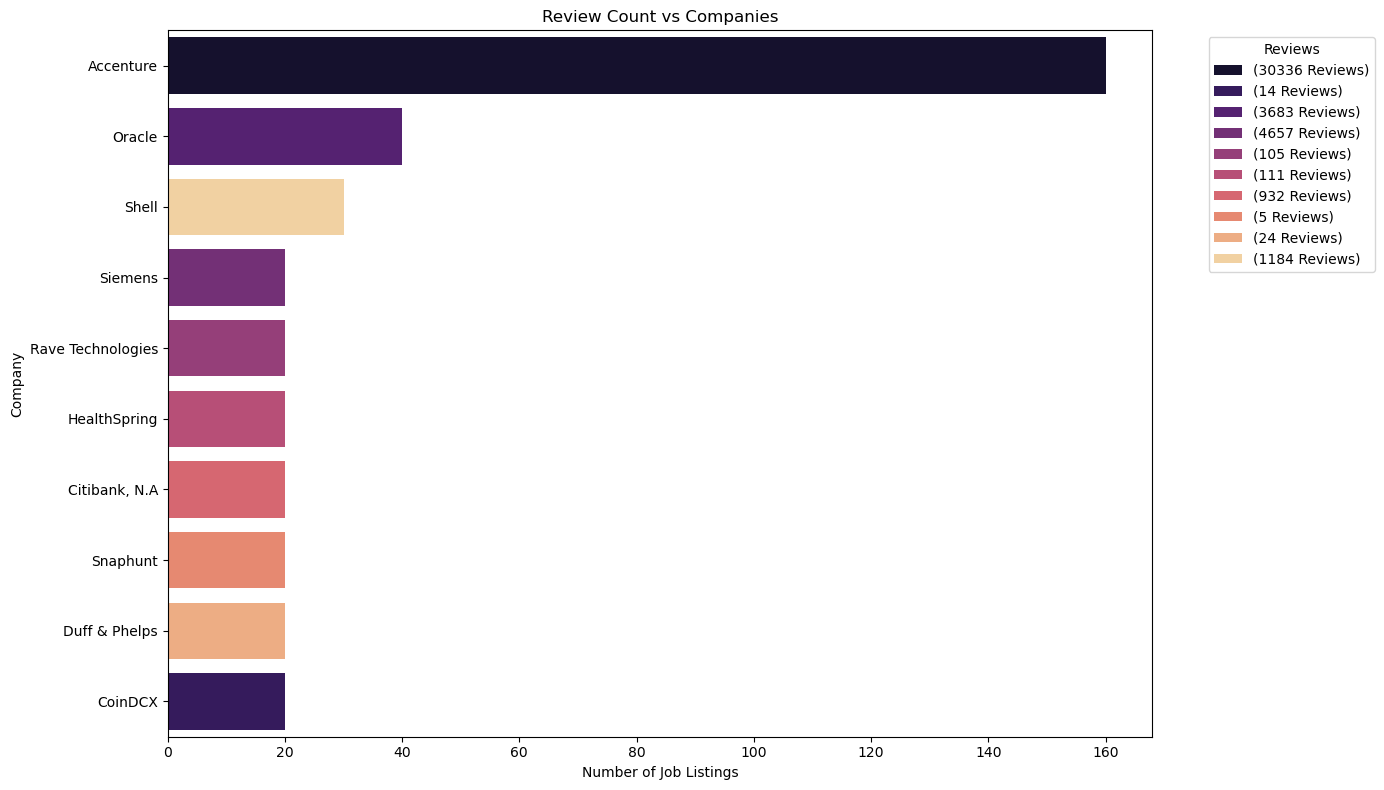

In [90]:
# Top 10 companies with most job listings
top_companies = df['Company'].value_counts().head(10).index
filtered_df = df[df['Company'].isin(top_companies)]

plt.figure(figsize=(14,8))
sns.countplot(data=filtered_df, y='Company', hue='Reviews', palette='magma', order=top_companies)

plt.title("Review Count vs Companies")
plt.xlabel("Number of Job Listings")
plt.ylabel("Company")
plt.legend(title='Reviews', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


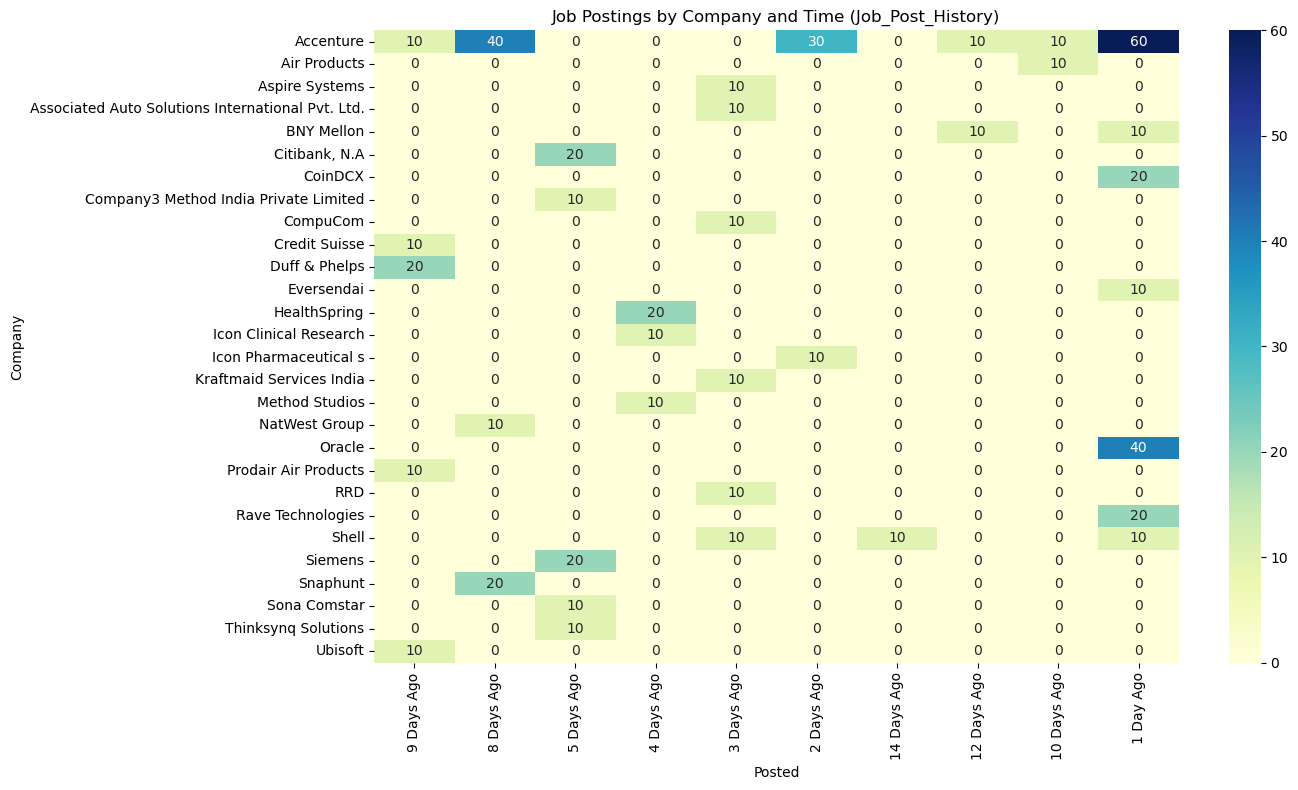

In [94]:

# Prepare data
filtered_df = df[df['Company'].isin(df['Company'].unique())]
pivot = pd.crosstab(filtered_df['Company'], filtered_df['Job_Post_History'])

# Sort columns in logical time order (if needed)
# You can sort manually or based on "n Days Ago" parsing if consistent
pivot = pivot[pivot.columns.sort_values(ascending=False)]  # optional: reverse chronological

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Job Postings by Company and Time (Job_Post_History)")
plt.xlabel("Posted")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

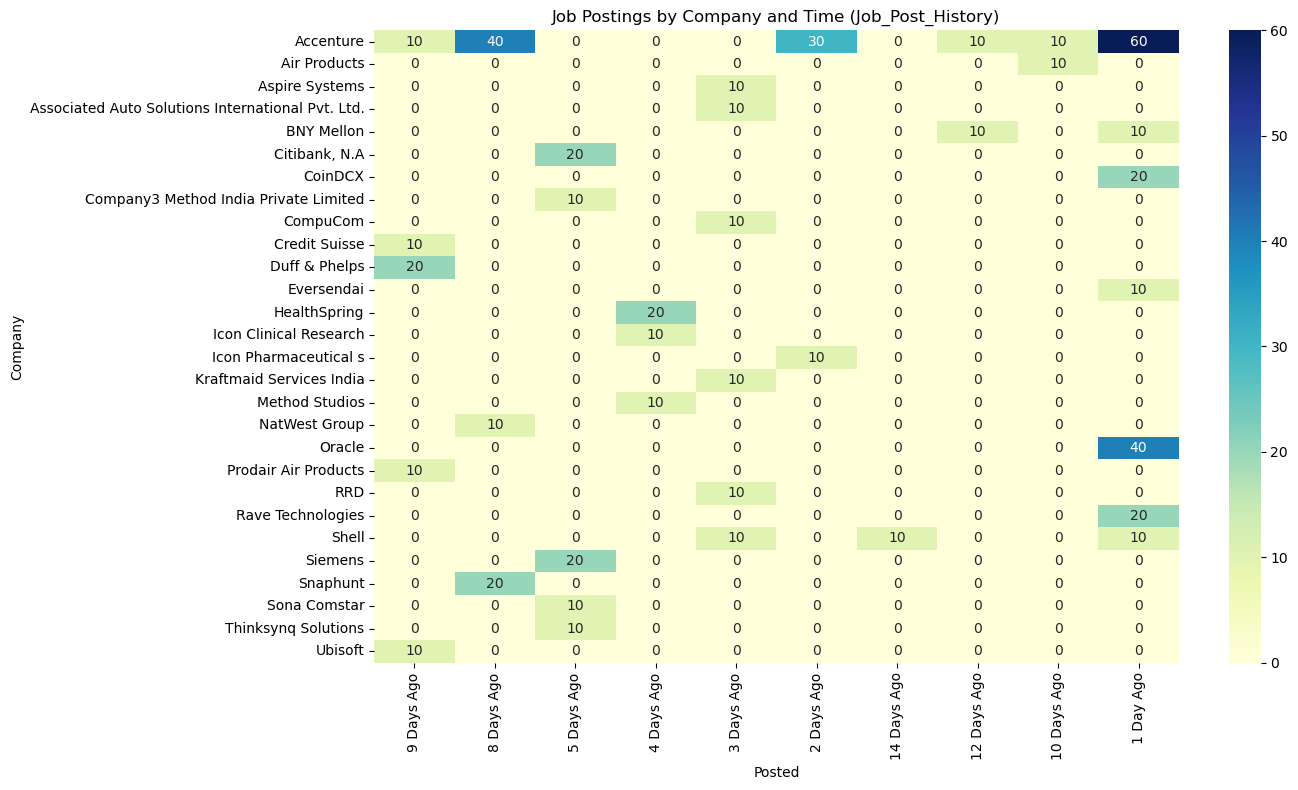

In [96]:
# Pivot table Company vs Job_Post_History
pivot = pd.crosstab(df['Company'], df['Job_Post_History'])

# Sort columns in logical time order (if needed)
# You can sort manually or based on "n Days Ago" parsing if consistent
pivot = pivot[pivot.columns.sort_values(ascending=False)]  # optional: reverse chronological

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Job Postings by Company and Time (Job_Post_History)")
plt.xlabel("Posted")
plt.ylabel("Company")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

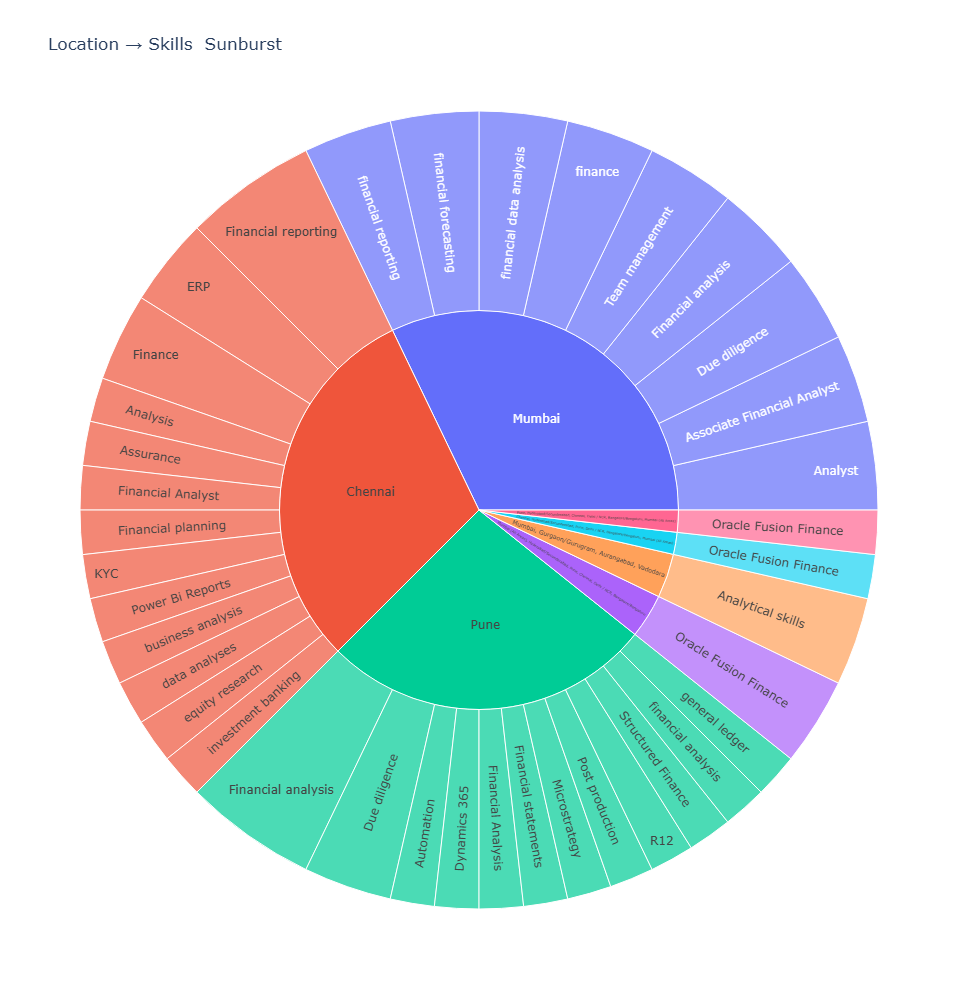

In [98]:
# Sunburst Location → Skills
fig = px.sunburst(df, path=['Location','Skills'], title='Location → Skills  Sunburst',width=1000,height=1000)
fig.show()

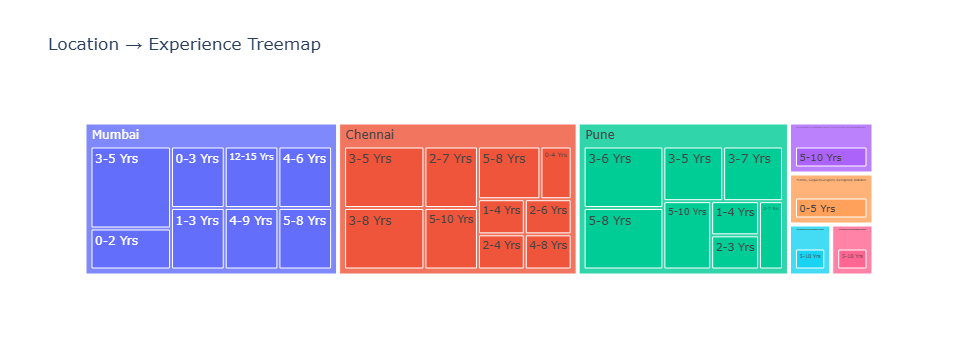

In [100]:
# Treemap Location → Experience
fig = px.treemap(df, path=['Location','Experience'], title='Location → Experience Treemap')
fig.show()

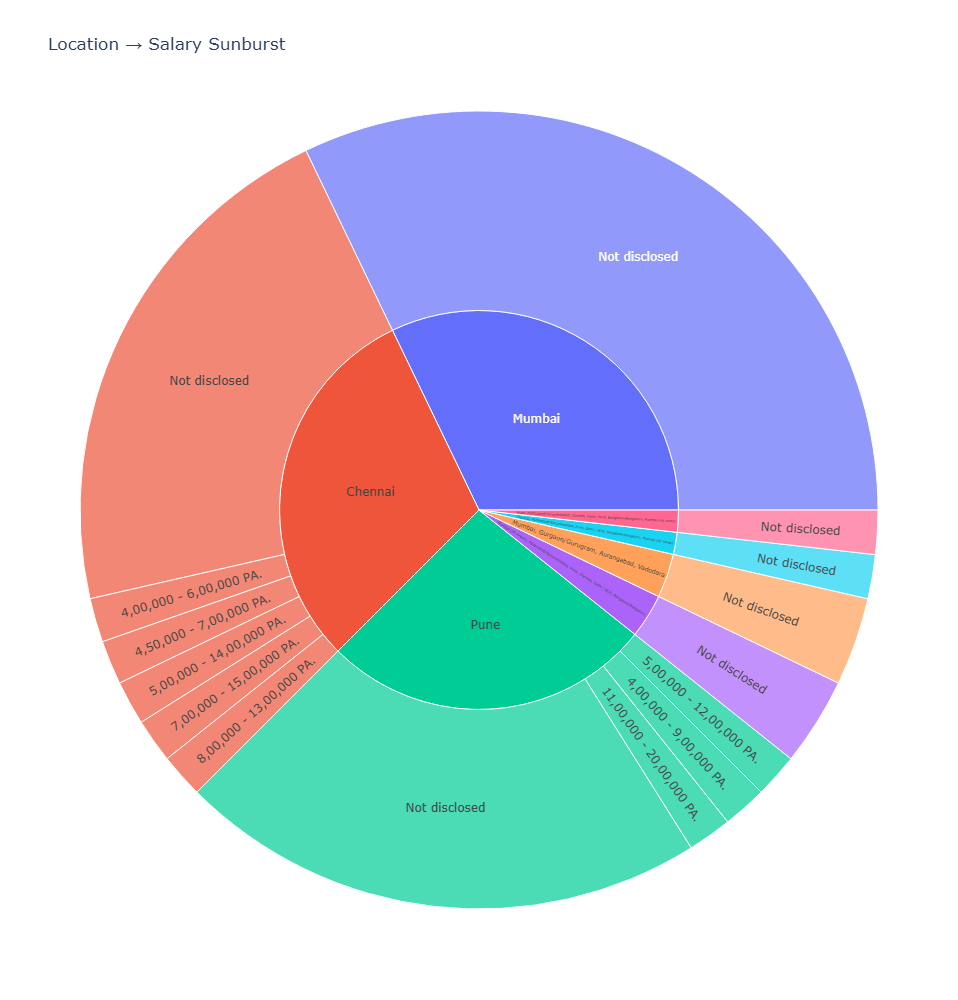

In [102]:
# Sunburst Location → Salary
fig = px.sunburst(df, path=['Location','Salary'], title='Location → Salary Sunburst',width=1000,height=1000)
fig.show()

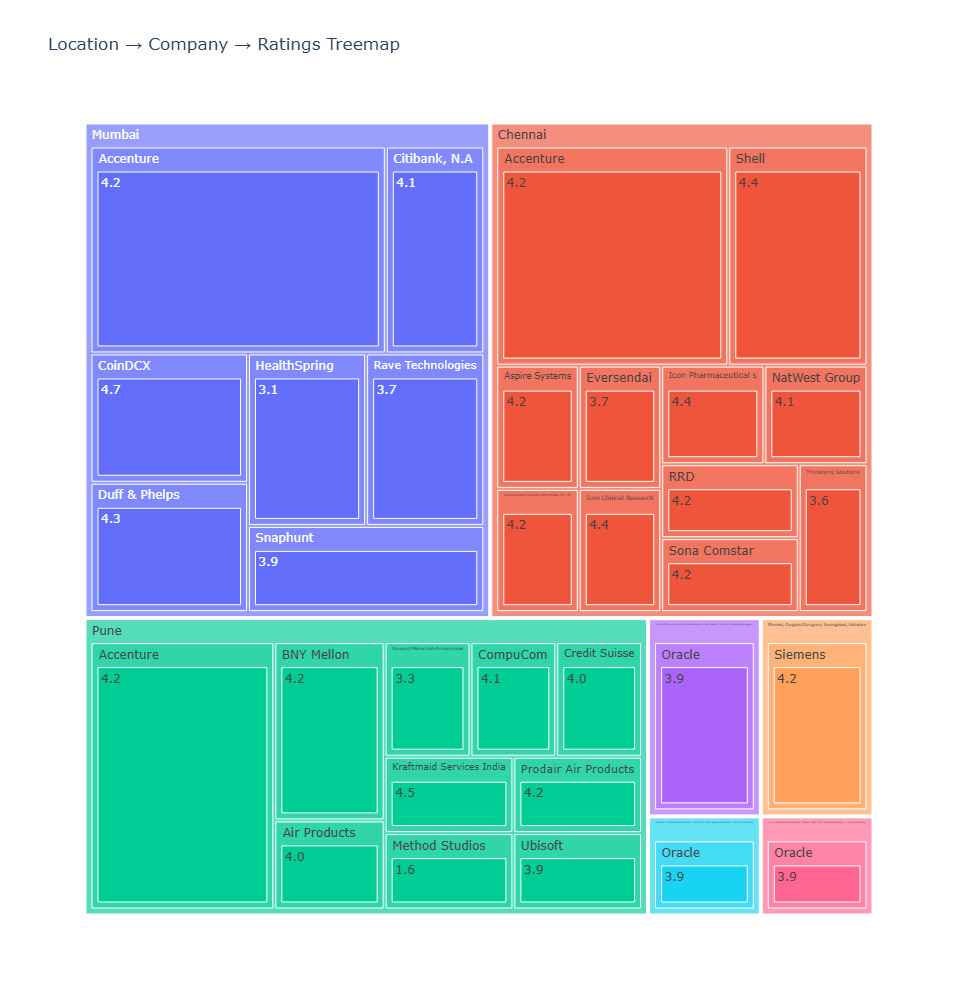

In [104]:
# Treemap Location → Company
fig = px.treemap(df, path=['Location','Company','Ratings'], title='Location → Company → Ratings Treemap',height=1000)
fig.show()

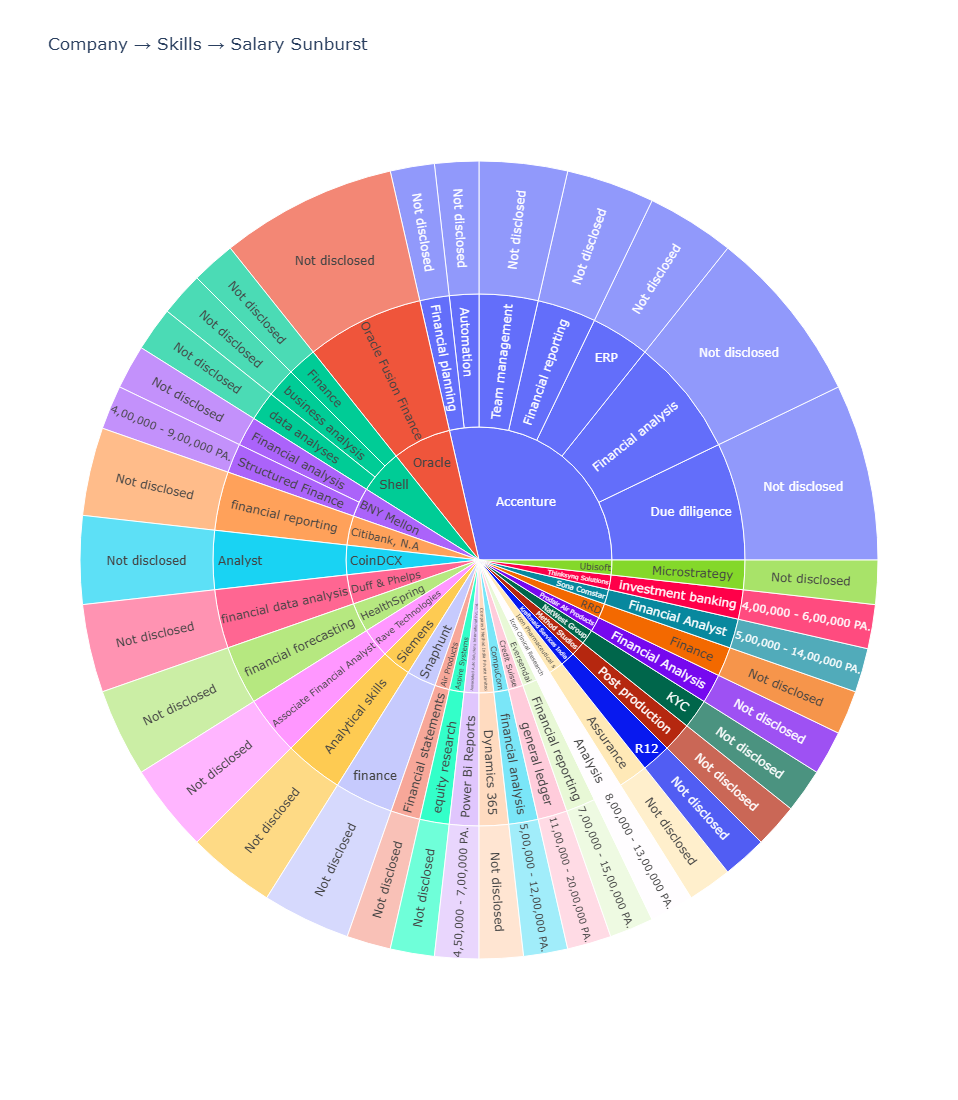

In [106]:
# Sunburst Company → Skills → Salary
fig = px.sunburst(df, 
                  path=['Company','Skills','Salary'], 
                  title='Company → Skills → Salary Sunburst',
                  width=1100,height=1100)
fig.show()

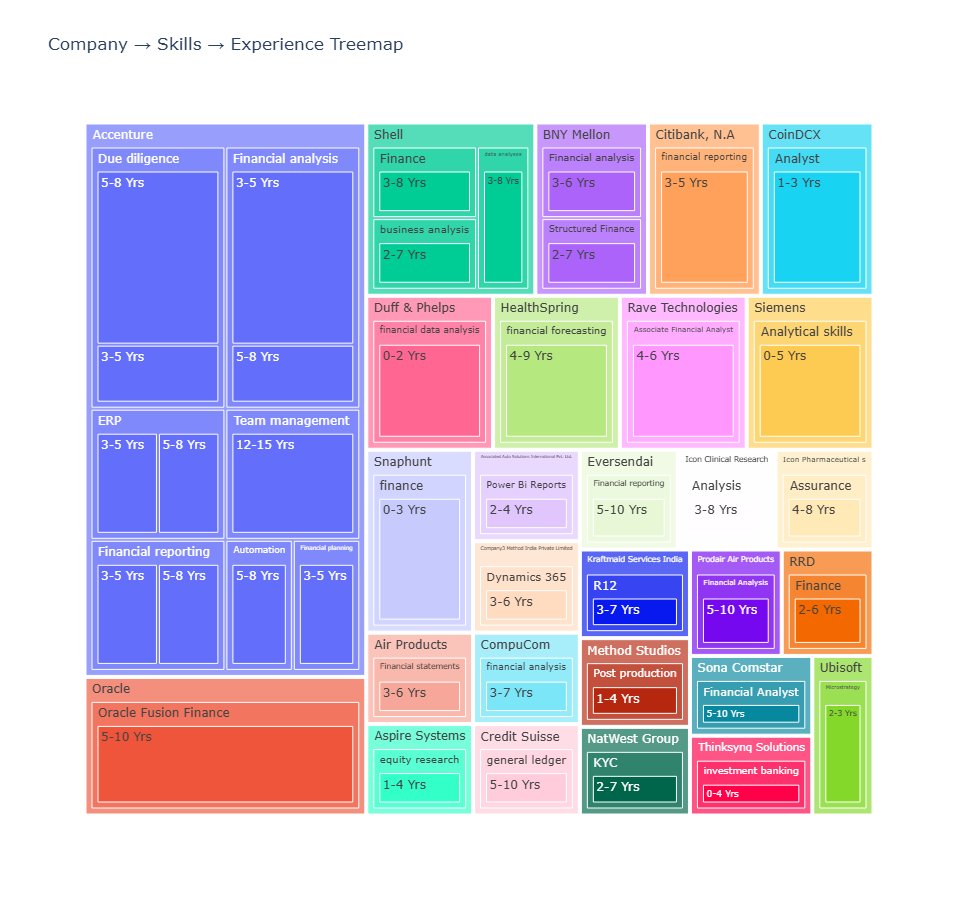

In [108]:
# Treemap Company → Skills → Experience
fig = px.treemap(df,
                 path=['Company','Skills','Experience'],
                 title='Company → Skills → Experience Treemap',height=900)

fig.show()

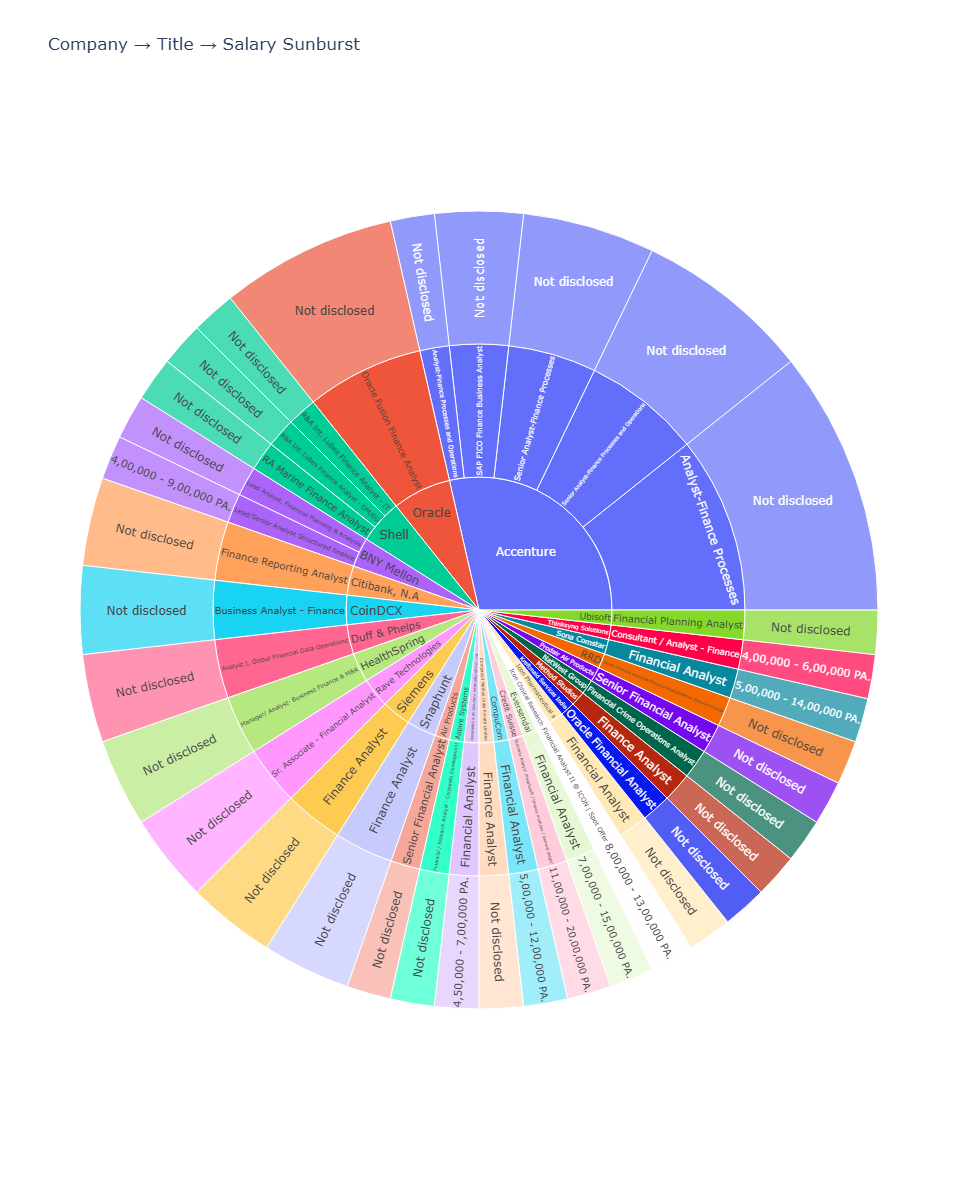

In [110]:
# Sunburst Company → Title → Salary
fig = px.sunburst(df, path=['Company','Title','Salary'], title='Company → Title → Salary Sunburst',width=1150,height=1200)
fig.show()

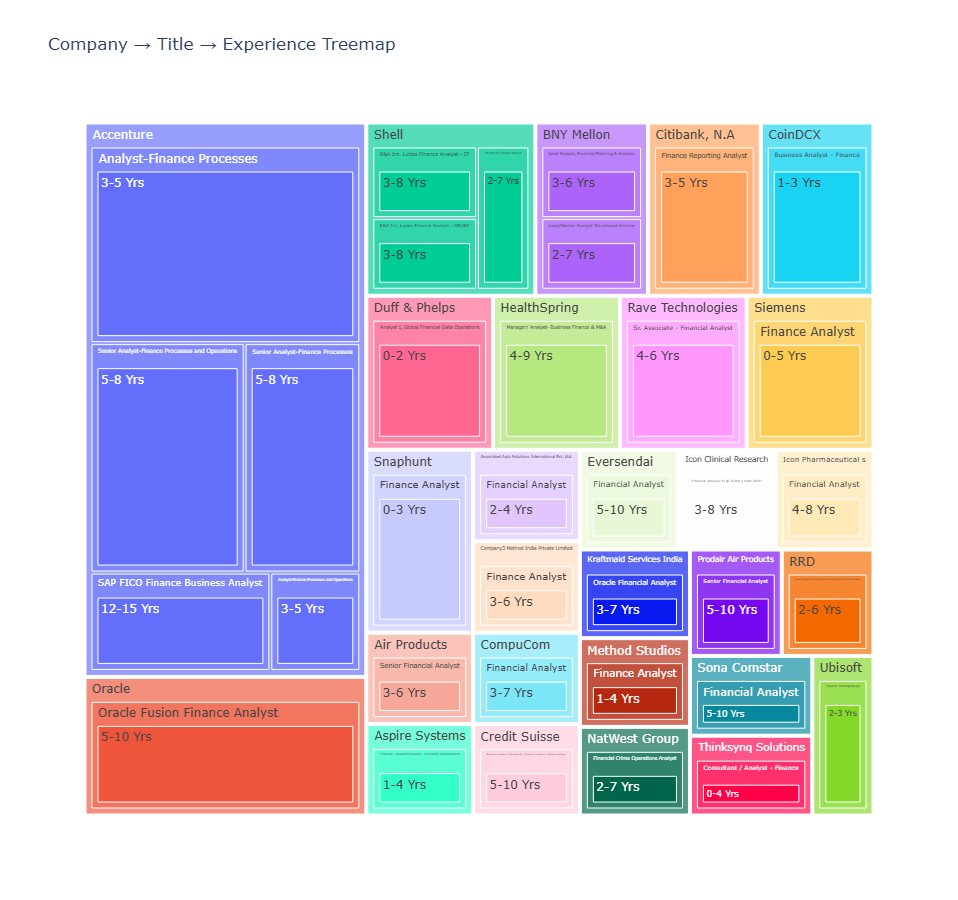

In [111]:
# Treemap Company → Title → Experience 
fig = px.treemap(df,
                 path=['Company','Title','Experience'],
                 title='Company → Title → Experience Treemap',height=900)

fig.show()

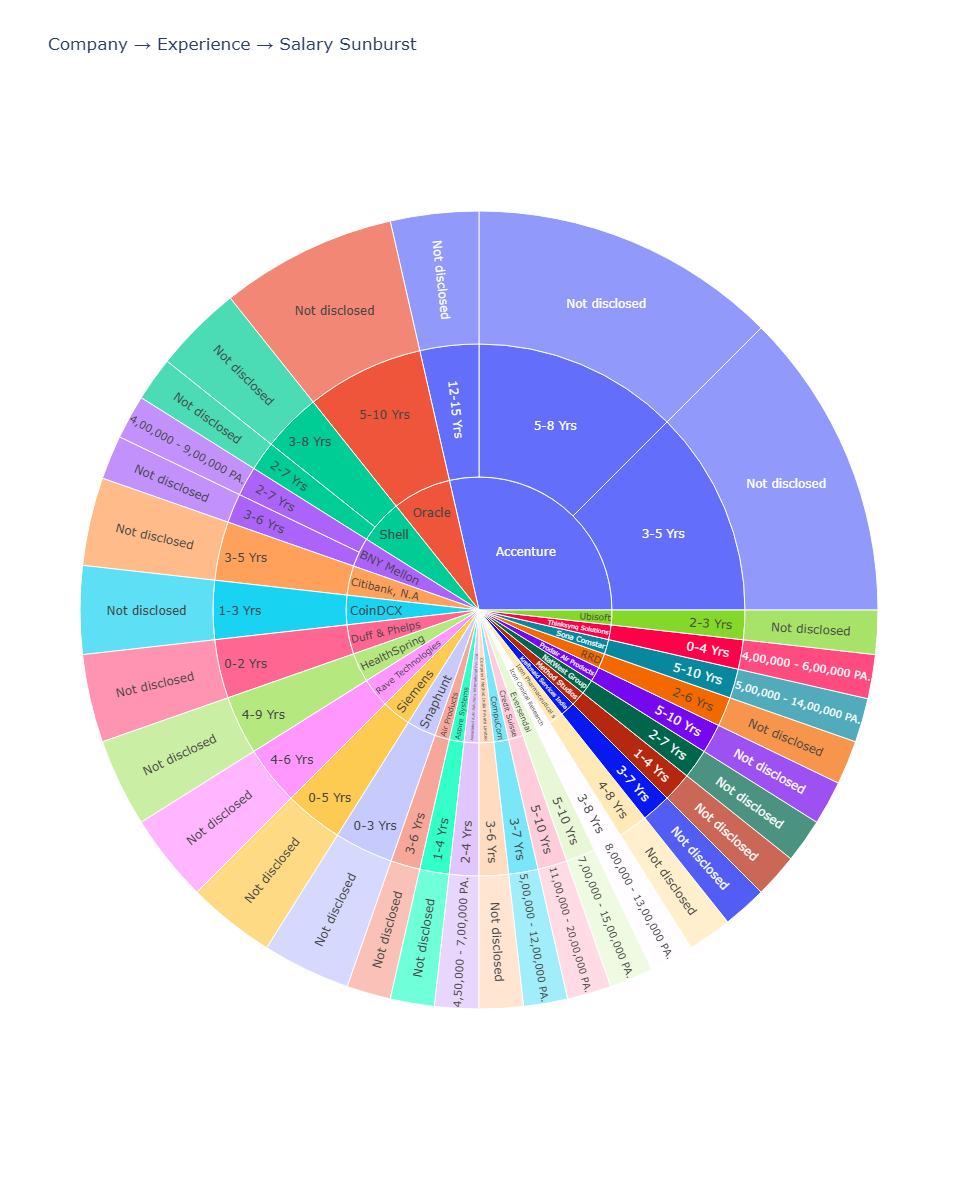

In [113]:
# Sunburst Company → Experience → Salary
fig = px.sunburst(df, path=['Company','Experience','Salary'], title='Company → Experience → Salary Sunburst',width=1150,height=1200)
fig.show()


===== Logistic Regression =====


C:\Users\Telang\Documents\Python Scripts\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Telang\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Telang\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

Accuracy: 0.78
Classification Report:
                                                 precision    recall  f1-score   support

    Analyst I, Global Financial Data Operations       0.00      0.00      0.00         4
                      Analyst-Finance Processes       1.00      1.00      1.00         9
                     Business Analyst - Finance       0.00      0.00      0.00         5
                                Finance Analyst       0.71      1.00      0.83        10
                              Financial Analyst       0.65      1.00      0.79        13
                  Oracle Fusion Finance Analyst       1.00      1.00      1.00         7
              SAP FICO Finance Business Analyst       1.00      1.00      1.00         4
               Senior Analyst-Finance Processes       0.56      0.83      0.67         6
Senior Analyst-Finance Processes and Operations       0.83      0.56      0.67         9
                       Senior Financial Analyst       1.00      0.60   

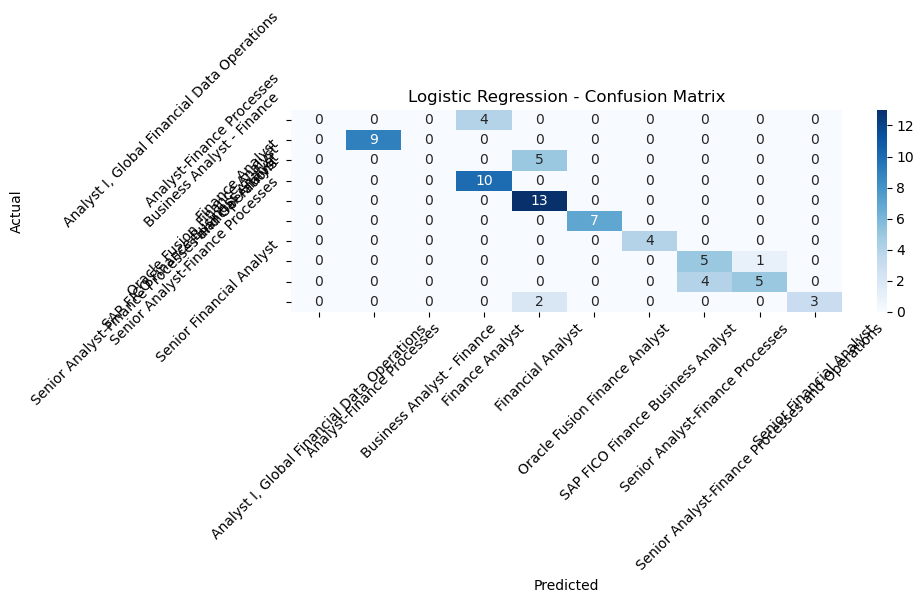


===== Random Forest =====
Accuracy: 0.99
Classification Report:
                                                 precision    recall  f1-score   support

    Analyst I, Global Financial Data Operations       1.00      1.00      1.00         4
                      Analyst-Finance Processes       1.00      1.00      1.00         9
                     Business Analyst - Finance       1.00      1.00      1.00         5
                                Finance Analyst       1.00      1.00      1.00        10
                              Financial Analyst       1.00      1.00      1.00        13
                  Oracle Fusion Finance Analyst       1.00      1.00      1.00         7
              SAP FICO Finance Business Analyst       1.00      1.00      1.00         4
               Senior Analyst-Finance Processes       1.00      0.83      0.91         6
Senior Analyst-Finance Processes and Operations       0.90      1.00      0.95         9
                       Senior Financial Anal

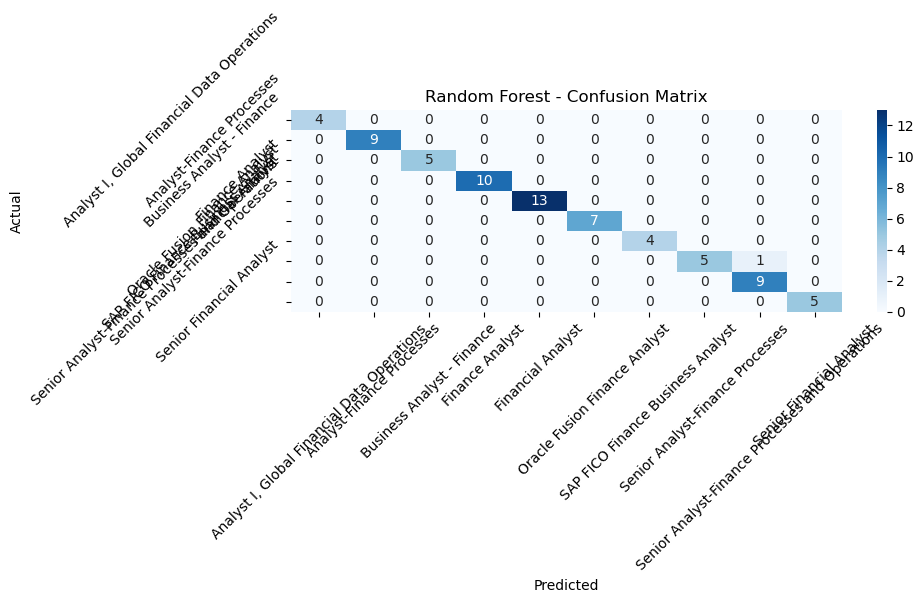


===== K-Nearest Neighbors =====
Accuracy: 0.99
Classification Report:
                                                 precision    recall  f1-score   support

    Analyst I, Global Financial Data Operations       1.00      1.00      1.00         4
                      Analyst-Finance Processes       1.00      1.00      1.00         9
                     Business Analyst - Finance       1.00      1.00      1.00         5
                                Finance Analyst       1.00      1.00      1.00        10
                              Financial Analyst       1.00      1.00      1.00        13
                  Oracle Fusion Finance Analyst       1.00      1.00      1.00         7
              SAP FICO Finance Business Analyst       1.00      1.00      1.00         4
               Senior Analyst-Finance Processes       1.00      0.83      0.91         6
Senior Analyst-Finance Processes and Operations       0.90      1.00      0.95         9
                       Senior Financia

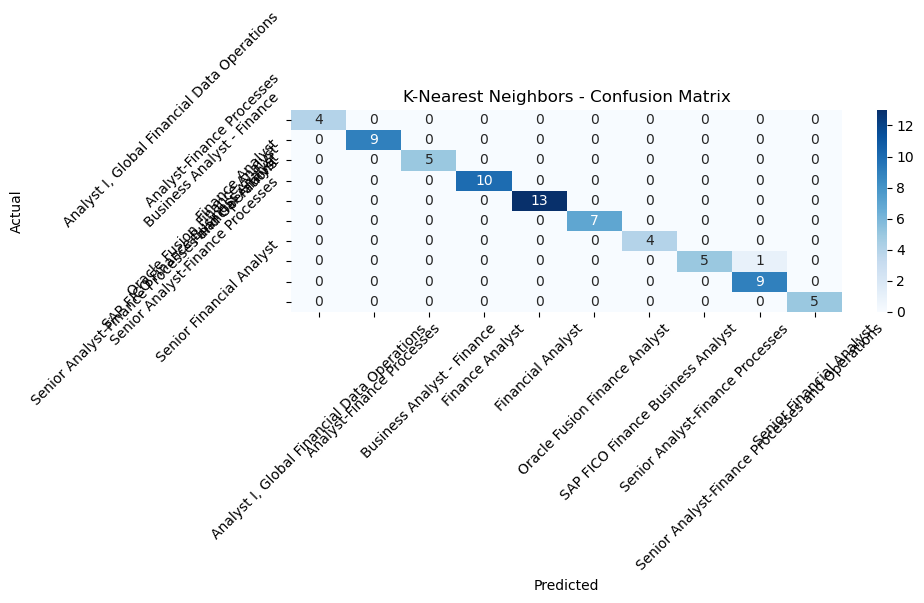


===== XGBoost =====


C:\Users\Telang\Documents\Python Scripts\Lib\site-packages\xgboost\core.py:158: UserWarning:

[08:04:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.99
Classification Report:
                                                 precision    recall  f1-score   support

    Analyst I, Global Financial Data Operations       1.00      1.00      1.00         4
                      Analyst-Finance Processes       1.00      1.00      1.00         9
                     Business Analyst - Finance       1.00      1.00      1.00         5
                                Finance Analyst       1.00      1.00      1.00        10
                              Financial Analyst       1.00      1.00      1.00        13
                  Oracle Fusion Finance Analyst       1.00      1.00      1.00         7
              SAP FICO Finance Business Analyst       1.00      1.00      1.00         4
               Senior Analyst-Finance Processes       1.00      0.83      0.91         6
Senior Analyst-Finance Processes and Operations       0.90      1.00      0.95         9
                       Senior Financial Analyst       1.00      1.00   

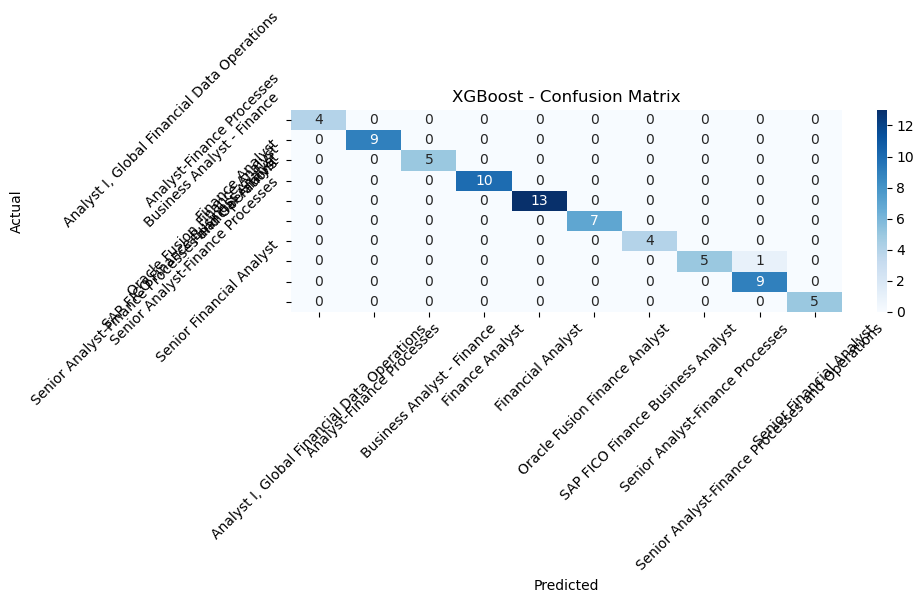

In [120]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Select Features & Target
features = ['Experience_Avg', 'Reviews', 'Ratings', 'Location', 'Company', 'Salary_Category']
target = 'Title'

# STEP 2: Filter top 10 job titles and remove missing values
top_titles = df_cleaned['Title'].value_counts().nlargest(10).index
df_filtered = df_cleaned[df_cleaned['Title'].isin(top_titles)].dropna(subset=features + [target])

# STEP 3: Encode Categorical Columns
le_company = LabelEncoder()
le_location = LabelEncoder()
le_salary = LabelEncoder()
le_title = LabelEncoder()

df_filtered['Company_enc'] = le_company.fit_transform(df_filtered['Company'])
df_filtered['Location_enc'] = le_location.fit_transform(df_filtered['Location'])
df_filtered['Salary_Category_enc'] = le_salary.fit_transform(df_filtered['Salary_Category'])
df_filtered['Title_enc'] = le_title.fit_transform(df_filtered['Title'])

# STEP 4: Define features (X) and target (y)
X = df_filtered[['Experience_Avg', 'Reviews', 'Ratings', 'Company_enc', 'Location_enc', 'Salary_Category_enc']]
y = df_filtered['Title_enc']

# STEP 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# STEP 7: Train, Predict, and Evaluate each model
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le_title.classes_))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_title.classes_, yticklabels=le_title.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [122]:
df.columns

Index(['Unnamed: 0', 'Company', 'Experience', 'Job_Post_History', 'Location',
       'Ratings', 'Reviews', 'Salary', 'Skills', 'Title', 'URL'],
      dtype='object')

In [124]:
df_cleaned

Company Experience Job_Post_History Location  Ratings  Reviews  \
0     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
1     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
2     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
3     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
4     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
..          ...        ...              ...      ...      ...      ...   
555  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
556  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
557  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
558  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
559  Eversendai   5-10 Yrs                1  Chennai      3.7      262   

                  Skills                                            Title  \
0          Due diligence  Senior Analyst-Finance Processes and Operations   
1          Due diligence  Senior Analyst-Finance Processes and Operations   
2          Due diligence  Senior Analyst-Finance Processes and Operations   
3          Due diligence  Senior Analyst-Finance Processes and Operations   
4          Due diligence  Senior Analyst-Finance Processes and Operations   
..                   ...                                              ...   
555  Financial reporting                                Financial Analyst   
556  Financial reporting                                Financial Analyst   
557  Financial reporting                                Financial Analyst   
558  Financial reporting                                Financial Analyst   
559  Financial reporting                                Financial Analyst   

                                                   URL  Experience_Min  \
0    https://www.naukri.com/job-listings-senior-ana...               5   
1    https://www.naukri.com/job-listings-senior-ana...               5   
2    https://www.naukri.com/job-listings-senior-ana...               5   
3    https://www.naukri.com/job-listings-senior-ana...               5   
4    https://www.naukri.com/job-listings-senior-ana...               5   
..                                                 ...             ...   
555  https://www.naukri.com/job-listings-financial-...               5   
556  https://www.naukri.com/job-listings-financial-...               5   
557  https://www.naukri.com/job-listings-financial-...               5   
558  https://www.naukri.com/job-listings-financial-...               5   
559  https://www.naukri.com/job-listings-financial-...               5   

     Experience_Max  Experience_Avg  Cleaned_Salary Salary_Category  
0                 8             6.5        900000.0          medium  
1                 8             6.5        900000.0          medium  
2                 8             6.5        900000.0          medium  
3                 8             6.5        900000.0          medium  
4                 8             6.5        900000.0          medium  
..              ...             ...             ...             ...  
555              10             7.5       1100000.0            high  
556              10             7.5       1100000.0            high  
557              10             7.5       1100000.0            high  
558              10             7.5       1100000.0            high  
559              10             7.5       1100000.0            high  

[560 rows x 14 columns]

In [150]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [168]:
# STEP 1: Select Features & Target
# STEP 2: Filter top 10 job titles and remove missing values
top_titles = df_cleaned['Title'].value_counts().nlargest(10).index
df_filtered = df_cleaned[df_cleaned['Title'].isin(top_titles)].dropna(subset=features + [target])

# STEP 3: Encode Categorical Columns
le_company = LabelEncoder()
le_location = LabelEncoder()
le_salary = LabelEncoder()
le_title = LabelEncoder()

df_filtered['Company_enc'] = le_company.fit_transform(df_filtered['Company'])
df_filtered['Location_enc'] = le_location.fit_transform(df_filtered['Location'])
df_filtered['Salary_Category_enc'] = le_salary.fit_transform(df_filtered['Salary_Category'])
df_filtered['Title_enc'] = le_title.fit_transform(df_filtered['Title'])

# STEP 4: Define features (X) and target (y)
X = df_filtered[['Experience_Avg', 'Reviews', 'Ratings', 'Company_enc', 'Location_enc']]
y = df_filtered['Title_enc']

# STEP 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [170]:
randomtree= RandomForestClassifier(random_state=42)


In [172]:
randomtree.fit(X_train, y_train)
y_pred = randomtree.predict(X_test)
y_pred

array([9, 5, 7, 1, 5, 1, 8, 5, 3, 3, 1, 4, 9, 4, 6, 3, 8, 1, 3, 4, 0, 9,
       4, 2, 7, 9, 0, 4, 2, 3, 5, 8, 4, 0, 6, 2, 2, 4, 1, 1, 8, 2, 1, 6,
       0, 4, 5, 8, 5, 4, 7, 4, 8, 3, 4, 7, 8, 6, 3, 7, 3, 5, 9, 3, 3, 1,
       4, 8, 4, 1, 8, 8])

In [174]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_title.classes_))

Accuracy: 0.99
Classification Report:
                                                 precision    recall  f1-score   support

    Analyst I, Global Financial Data Operations       1.00      1.00      1.00         4
                      Analyst-Finance Processes       1.00      1.00      1.00         9
                     Business Analyst - Finance       1.00      1.00      1.00         5
                                Finance Analyst       1.00      1.00      1.00        10
                              Financial Analyst       1.00      1.00      1.00        13
                  Oracle Fusion Finance Analyst       1.00      1.00      1.00         7
              SAP FICO Finance Business Analyst       1.00      1.00      1.00         4
               Senior Analyst-Finance Processes       1.00      0.83      0.91         6
Senior Analyst-Finance Processes and Operations       0.90      1.00      0.95         9
                       Senior Financial Analyst       1.00      1.00   

In [176]:
df.columns

Index(['Unnamed: 0', 'Company', 'Experience', 'Job_Post_History', 'Location',
       'Ratings', 'Reviews', 'Salary', 'Skills', 'Title', 'URL'],
      dtype='object')

In [178]:
df_cleaned

Company Experience Job_Post_History Location  Ratings  Reviews  \
0     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
1     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
2     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
3     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
4     Accenture    5-8 Yrs                1   Mumbai      4.2    30336   
..          ...        ...              ...      ...      ...      ...   
555  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
556  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
557  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
558  Eversendai   5-10 Yrs                1  Chennai      3.7      262   
559  Eversendai   5-10 Yrs                1  Chennai      3.7      262   

                  Skills                                            Title  \
0          Due diligence  Senior Analyst-Finance Processes and Operations   
1          Due diligence  Senior Analyst-Finance Processes and Operations   
2          Due diligence  Senior Analyst-Finance Processes and Operations   
3          Due diligence  Senior Analyst-Finance Processes and Operations   
4          Due diligence  Senior Analyst-Finance Processes and Operations   
..                   ...                                              ...   
555  Financial reporting                                Financial Analyst   
556  Financial reporting                                Financial Analyst   
557  Financial reporting                                Financial Analyst   
558  Financial reporting                                Financial Analyst   
559  Financial reporting                                Financial Analyst   

                                                   URL  Experience_Min  \
0    https://www.naukri.com/job-listings-senior-ana...               5   
1    https://www.naukri.com/job-listings-senior-ana...               5   
2    https://www.naukri.com/job-listings-senior-ana...               5   
3    https://www.naukri.com/job-listings-senior-ana...               5   
4    https://www.naukri.com/job-listings-senior-ana...               5   
..                                                 ...             ...   
555  https://www.naukri.com/job-listings-financial-...               5   
556  https://www.naukri.com/job-listings-financial-...               5   
557  https://www.naukri.com/job-listings-financial-...               5   
558  https://www.naukri.com/job-listings-financial-...               5   
559  https://www.naukri.com/job-listings-financial-...               5   

     Experience_Max  Experience_Avg  Cleaned_Salary Salary_Category  
0                 8             6.5        900000.0          medium  
1                 8             6.5        900000.0          medium  
2                 8             6.5        900000.0          medium  
3                 8             6.5        900000.0          medium  
4                 8             6.5        900000.0          medium  
..              ...             ...             ...             ...  
555              10             7.5       1100000.0            high  
556              10             7.5       1100000.0            high  
557              10             7.5       1100000.0            high  
558              10             7.5       1100000.0            high  
559              10             7.5       1100000.0            high  

[560 rows x 14 columns]

In [180]:
!pip install joblib

In [182]:
import joblib

In [184]:
joblib.dump(randomtree,'naukri_analysis.pkl')


['naukri_analysis.pkl']

In [186]:
import streamlit as st
import numpy as np
import joblib

In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the trained XGBoost model
randomtree = joblib.load('naukri_analysis.pkl')

# Title and Description
st.title('Naukri Job Analysis')
st.write('Enter your skills, experience, location, rating, and company to predict your best job match!')

# Skills input
Reviews=st.number_input("enter number of reviews : ",min_value=0,max_value=100000,value=0)
#skills_options = [
#    'Due diligence', 'Analyst', 'Oracle Fusion Finance, 'Analytical skills', 
 #   'Associate Financial Analyst', 'Financial analysis', 'financial forecasting',
 #   'financial reporting', 'Team management', 'finance', 'financial data analysis',
#    'Structured Finance', 'Automation', 'general ledger', 'Financial statements',
#    'Microstrategy', 'Post production', 'Dynamics 365', 'Financial reporting', 
#    'investment banking', 'Finance', 'ERP', 'Analysis', 'Financial planning', 
#    'equity research', 'data analyses', 'Power Bi Reports', 'Financial Analyst', 
 #   'KYC', 'business analysis'
#]
#Skills = st.multiselect("Select your skills:", skills_options)

# Experience input
experience_minimum = st.number_input('Minimum experience:', min_value=0, max_value=12, value=0)
experience_maximum = st.number_input('Maximum experience:', min_value=0, max_value=15, value=0)
Experience_Avg = (experience_minimum + experience_maximum) / 2.0

# Location input
location_options = [
    'Mumbai ','Mumbai (All Areas)','Mumbai (All Areas), Hyderabad/Secunderabad, Pune, Chennai, Delhi / NCR, Bangalore/Bengaluru', 'Hyderabad/Secunderabad, Pune, Chennai, Delhi / NCR, Bangalore/Bengaluru', 'Hyderabad/Secunderabad', 'Pune', 'Chennai', 'Delhi / NCR', 
    'Bangalore/Bengaluru', 'Chennai(Teynampet)', 'Chennai(Kodambakkam)','Mumbai, Gurgaon/Gurugram, Aurangabad, Vadodara',
    'Pune, Hyderabad/Secunderabad, Chennai, Delhi / NCR, Bangalore/Bengaluru, Mumbai (All Areas)','Pune','Chennai, Hyderabad/Secunderabad, Pune, Delhi / NCR, Bangalore/Bengaluru, Mumbai (All Areas)',
    'Chennai(Ekkaduthangal)','Chennai(Kodambakkam), Kodambakkam'
]
Location = st.selectbox("Select your location:", location_options)

# Rating input
Ratings = st.number_input('Your rating (out of 5)', min_value=0.0, max_value=5.0, value=3.0)

# Company inputcompany_options = [
    'Accenture', 'Oracle', 'Siemens', 'BNY Mellon', 'CoinDCX', 'Rave Technologies', 
    'HealthSpring', 'Citibank, N.A', 'Snaphunt', 'Duff & Phelps', 'Credit Suisse', 
    'Prodair Air Products', 'Ubisoft', 'CompuCom', 'Kraftmaid Services India', 
    'Method Studios', 'Company3 Method India Private Limited', 'Eversendai', 'Shell', 
    'NatWest Group', 'Sona Comstar', 'RRD', 'Thinksynq Solutions', 'Icon Clinical Research', 
    'Aspire Systems'
]
Company = st.selectbox('Select your company:', company_options)

if st.button('Predict'):
    # Prepare the features for prediction
    # label encode the categorical variables (Skills, Location, Company)
    encoder = LabelEncoder()

    # Encode Location
    encoder_loc = LabelEncoder()
    encoder_loc.fit(location_options)
    location_encoded = encoder_loc.transform([Location])[0]

# Encode Company
    encoder_comp = LabelEncoder()
    encoder_comp.fit(company_options)
    company_encoded = encoder_comp.transform([Company])[0]


# Combine all features into a single array for prediction
    features = np.array([[Experience_Avg, Reviews, Ratings, company_encoded, location_encoded]])




    
    
    
   
    
    # Combine all features into a single array for prediction
   # features = np.array([['Experience_Avg', 'Reviews', 'Ratings', 'Company_encoded', 'Location_encoded']])
    
    # Make prediction
    prediction = randomtree.predict(features)
    st.success(f'The best job match for you is: {prediction[0]}')

    # Store prediction for plotting if needed
    st.session_state.prediction = prediction

if st.button("Show Predictions Plot"):
    if 'prediction' in st.session_state:
        plt.figure(figsize=(10, 6))
        plt.plot(st.session_state.prediction, 'bo', label='Prediction')
        plt.xlabel('Samples')
        plt.ylabel('Job Match Score')
        plt.title('Prediction of best available job(title)')
        plt.legend()
        st.pyplot(plt)
    else:
        st.warning("Please make a prediction first by clicking the 'Predict' button")


In [188]:
import os
print(os.getcwd())

C:\Users\Telang


In [ ]:
streamlit_code="""
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the trained XGBoost model
randomtree = joblib.load('naukri_analysis.pkl')

# Title and Description
st.title('Naukri Job Analysis')
st.write('Enter your skills, experience, location, rating, and company to predict your best job match!')

# Skills input
Reviews=st.number_input("enter number of reviews : ",min_value=0,max_value=100000,value=0)
#skills_options = [
#    'Due diligence', 'Analyst', 'Oracle Fusion Finance', 'Analytical skills', 
 #   'Associate Financial Analyst', 'Financial analysis', 'financial forecasting',
 #   'financial reporting', 'Team management', 'finance', 'financial data analysis',
#    'Structured Finance', 'Automation', 'general ledger', 'Financial statements',
#    'Microstrategy', 'Post production', 'Dynamics 365', 'Financial reporting', #    'investment banking', 'Finance', 'ERP', 'Analysis', 'Financial planning', 
#    'equity research', 'data analyses', 'Power Bi Reports', 'Financial Analyst', 
 #   'KYC', 'business analysis'
#]
#Skills = st.multiselect("Select your skills:", skills_options)

# Experience input
experience_minimum = st.number_input('Minimum experience:', min_value=0, max_value=12, value=0)
experience_maximum = st.number_input('Maximum experience:', min_value=0, max_value=15, value=0)
Experience_Avg = (experience_minimum + experience_maximum) / 2.0

# Location input
location_options = [
    'Mumbai ','Mumbai (All Areas)','Mumbai (All Areas), Hyderabad/Secunderabad, Pune, Chennai, Delhi / NCR, Bangalore/Bengaluru', 'Hyderabad/Secunderabad, Pune, Chennai, Delhi / NCR, Bangalore/Bengaluru', 'Hyderabad/Secunderabad', 'Pune', 'Chennai', 'Delhi / NCR', 
    'Bangalore/Bengaluru', 'Chennai(Teynampet)', 'Chennai(Kodambakkam)','Mumbai, Gurgaon/Gurugram, Aurangabad, Vadodara',
    'Pune, Hyderabad/Secunderabad, Chennai, Delhi / NCR, Bangalore/Bengaluru, Mumbai (All Areas)','Pune','Chennai, Hyderabad/Secunderabad, Pune, Delhi / NCR, Bangalore/Bengaluru, Mumbai (All Areas)',
    'Chennai(Ekkaduthangal)','Chennai(Kodambakkam), Kodambakkam'
]
Location = st.selectbox("Select your location:", location_options)

# Rating input
Ratings = st.number_input('Your rating (out of 5)', min_value=0.0, max_value=5.0, value=3.0)
# Company input
company_options = [
    'Accenture', 'Oracle', 'Siemens', 'BNY Mellon', 'CoinDCX', 'Rave Technologies', 
    'HealthSpring', 'Citibank, N.A', 'Snaphunt', 'Duff & Phelps', 'Credit Suisse', 
    'Prodair Air Products', 'Ubisoft', 'CompuCom', 'Kraftmaid Services India', 
    'Method Studios', 'Company3 Method India Private Limited', 'Eversendai', 'Shell', 
    'NatWest Group', 'Sona Comstar', 'RRD', 'Thinksynq Solutions', 'Icon Clinical Research', 
    'Aspire Systems'
]
Company = st.selectbox('Select your company:', company_options)

if st.button('Predict'):
    # Prepare the features for prediction
    # label encode the categorical variables (Skills, Location, Company)
    encoder = LabelEncoder()

    # Encode Location
    encoder_loc = LabelEncoder()
    encoder_loc.fit(location_options)
    location_encoded = encoder_loc.transform([Location])[0]

# Encode Company
    encoder_comp = LabelEncoder()
    encoder_comp.fit(company_options)
     company_encoded = encoder_comp.transform([Company])[0]


# Combine all features into a single array for prediction
    features = np.array([[Experience_Avg, Reviews, Ratings, company_encoded, location_encoded]])




     # Combine all features into a single array for prediction
   # features = np.array([['Experience_Avg', 'Reviews', 'Ratings', 'Company_encoded', 'Location_encoded']])
    
    # Make prediction
    prediction = randomtree.predict(features)
    st.success(f'The best job match for you is: {prediction[0]}')

    # Store prediction for plotting if needed
    st.session_state.prediction = prediction

if st.button("Show Predictions Plot"):
    if 'prediction' in st.session_state:
        plt.figure(figsize=(10, 6))
        plt.plot(st.session_state.prediction, 'bo', label='Prediction')
        plt.xlabel('Samples')
        plt.ylabel('Job Match Score')
        plt.title('Prediction of best available job(title)')
        plt.legend()
        st.pyplot(plt)
        else:
        st.warning("Please make a prediction first by clicking the 'Predict' button")

"""
with open('apps.py', 'w') as f:
    f.write(streamlit_code)


In [190]:
import os
print(os.listdir())

['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.dotnet', '.git', '.git-for-windows-updater', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.lesshst', '.matplotlib', '.ms-ad', '.node_repl_history', '.streamlit', '.templateengine', '.vscode', '10-07-2024.ipynb', '11-07-24graph.ipynb', '18_07_24.ipynb', '18_12_clustering.ipynb', '1NPDPRO5.DOC', '22_07.ipynb', '24_07linear regression.ipynb', '25_07.ipynb', '29_07.ipynb', '3D Objects', '3_9_24activation.ipynb', 'AI tutor project.py', 'app.py', 'AppData', 'Application Data', 'Assignment03_python.ipynb', 'Assignment04_HYPOTHESIS.ipynb', 'Assignment05_EDA1.ipynb', 'Assignment_07logistic regression.ipynb', 'Assignment_1basic stats _DS.ipynb', 'assignment_8clustering.ipynb', 'Assignment_Basic_ stat2.ipynb', 'Assign_LOGISTIC _REGRESSION.ipynb', 'assign_random_forest.ipynb', 'association_04.ipynb', 'association_assign.ipynb', 'Association_rules.ipynb', 'BASIC_PYTHON.ipynb', 'class_and_obj.ipynb', '

In [194]:
!pip install --upgrade scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 3.9 MB/s eta 0:00:03


  You can safely remove it manually.


    --------------------------------------- 0.2/11.1 MB 2.5 MB/s eta 0:00:05
    --------------------------------------- 0.3/11.1 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.1 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.1 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.1 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.1 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.1 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.1 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/11.1 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.6/11.1 MB 1.0 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.1 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.1/11.1 MB 1.3 MB/s eta 0:00:08